In [1]:
# Credits: https://github.com/SullyChen/Autopilot-TensorFlow
# Research paper: End to End Learning for Self-Driving Cars by Nvidia. [https://arxiv.org/pdf/1604.07316.pdf]

# NVidia dataset: 72 hrs of video => 72*60*60*30 = 7,776,000 images
# Nvidia blog: https://devblogs.nvidia.com/deep-learning-self-driving-cars/


# Our Dataset: https://github.com/SullyChen/Autopilot-TensorFlow [https://drive.google.com/file/d/0B-KJCaaF7elleG1RbzVPZWV4Tlk/view]
# Size: 25 minutes = 25*60*30 = 45,000 images ~ 2.3 GB


# If you want to try on a slightly large dataset: 70 minutes of data ~ 223GB
# Refer: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5
# Format: Image, latitude, longitude, gear, brake, throttle, steering angles and speed



# Additional Installations:
# pip3 install h5py


# AWS: https://aws.amazon.com/blogs/machine-learning/get-started-with-deep-learning-using-the-aws-deep-learning-ami/

# Youtube:https://www.youtube.com/watch?v=qhUvQiKec2U
# Further reading and extensions: https://medium.com/udacity/teaching-a-machine-to-steer-a-car-d73217f2492c
# More data: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5

In [2]:
import numpy as np
a = np.array([[1,2,3],[3,4,5]])
print(a)
print(a[-1:])

[[1 2 3]
 [3 4 5]]
[[3 4 5]]


In [27]:
#function to play sound in windows when execution is over
def playsound():
    try:
        import winsound
        frequency = 1000  # Set Frequency To 2500 Hertz
        duration = 800  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
    except:
        print("you are not in windows")
    

### driving_data.py

In [23]:
import scipy.misc
import random

xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

#read data.txt
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

In [25]:
#get number of images
num_images = len(xs)
num_images

45406

In [26]:
train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = ys[-int(len(xs) * 0.2):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

In [28]:
# scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0
# you can break the whole line into parts like this
# here (train_batch_pointer + i) % num_train_images => "% num_train_images" is used to make sure that the
# (train_batch_pointer + i) values should not cross number of train images.
# import scipy.misc
# lets explain whats happening with the first images
image_read = scipy.misc.imread(train_xs[0])
print("original image size",image_read.shape)

print("After taking the last 150 rows i.e lower part of the images where road is present, ",image_read[-150:].shape)
image_read = image_read[-150:]
resized_image = scipy.misc.imresize(image_read, [66, 200])
print("After resizing the images into 66*200, ",resized_image.shape)
# 200/66 = 455/150 = 3.0303 => we are keeping aspect ratio when we are resizing it

D:\Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


original image size (256, 455, 3)
After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
After resizing the images into 66*200,  (66, 200, 3)


D:\Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


In [29]:
scipy.misc.imresize(scipy.misc.imread(train_xs[0])[-150:], [66, 200])

D:\Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
D:\Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


array([[[180, 162, 166],
        [176, 172, 173],
        [176, 176, 171],
        ...,
        [ 90,  88, 113],
        [106,  93,  99],
        [101, 103,  81]],

       [[191, 188, 192],
        [186, 193, 204],
        [187, 196, 200],
        ...,
        [ 84,  82,  97],
        [ 86,  88,  79],
        [ 86, 101,  74]],

       [[208, 201, 223],
        [199, 212, 230],
        [201, 212, 226],
        ...,
        [128, 124, 115],
        [128, 126, 117],
        [132, 126, 119]],

       ...,

       [[ 54,  43,  55],
        [ 59,  43,  56],
        [ 55,  41,  53],
        ...,
        [ 23,  24,  25],
        [ 24,  25,  27],
        [ 25,  26,  29]],

       [[ 56,  36,  58],
        [ 53,  35,  63],
        [ 51,  39,  54],
        ...,
        [ 23,  25,  22],
        [ 23,  26,  23],
        [ 24,  27,  25]],

       [[ 68,  37,  44],
        [ 53,  41,  49],
        [ 49,  49,  37],
        ...,
        [ 28,  25,  26],
        [ 26,  23,  25],
        [ 24,  22,  24]]

In [57]:
# xs

In [31]:
# import scipy.misc
# import random

# xs = []
# ys = []

# #points to the end of the last batch
# train_batch_pointer = 0
# val_batch_pointer = 0

# #read data.txt
# with open("driving_dataset/data.txt") as f:
#     for line in f:
#         xs.append("driving_dataset/" + line.split()[0])
#         #the paper by Nvidia uses the inverse of the turning radius,
#         #but steering wheel angle is proportional to the inverse of turning radius
#         #so the steering wheel angle in radians is used as the output
#         ys.append(float(line.split()[1]) * scipy.pi / 180)

# #get number of images
# num_images = len(xs)


# train_xs = xs[:int(len(xs) * 0.8)]
# train_ys = ys[:int(len(xs) * 0.8)]

# val_xs = xs[-int(len(xs) * 0.2):]
# val_ys = ys[-int(len(xs) * 0.2):]

# num_train_images = len(train_xs)
# num_val_images = len(val_xs)

def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], [66, 200]) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


In [52]:
import tensorflow as tf
import scipy

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, stride):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66, 200, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

x_image = x

#first convolutional layer
W_conv1 = weight_variable([5, 5, 3, 24])
b_conv1 = bias_variable([24])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 2) + b_conv1)

#second convolutional layer
W_conv2 = weight_variable([5, 5, 24, 36])
b_conv2 = bias_variable([36])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, 2) + b_conv2)

#third convolutional layer
W_conv3 = weight_variable([5, 5, 36, 48])
b_conv3 = bias_variable([48])

h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, 2) + b_conv3)

#fourth convolutional layer
W_conv4 = weight_variable([3, 3, 48, 64])
b_conv4 = bias_variable([64])

h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4, 1) + b_conv4)

#fifth convolutional layer
W_conv5 = weight_variable([3, 3, 64, 64])
b_conv5 = bias_variable([64])

h_conv5 = tf.nn.relu(conv2d(h_conv4, W_conv5, 1) + b_conv5)

#FCL 1
W_fc1 = weight_variable([1152, 1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conv5, [-1, 1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#FCL 2
W_fc2 = weight_variable([1164, 100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#FCL 3
W_fc3 = weight_variable([100, 50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#FCL 3
W_fc4 = weight_variable([50, 10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, W_fc4) + b_fc4)

h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)

#Output
W_fc5 = weight_variable([10, 1])
b_fc5 = bias_variable([1])

y = tf.multiply(tf.atan(tf.matmul(h_fc4_drop, W_fc5) + b_fc5), 2) #scale the atan output


In [53]:
# read images and steering angles from driving_dataset folder

from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice



DATA_FOLDER = './driving_dataset/' # change this to your folder
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.8
X = []
y = []
LIMIT=None
with open(TRAIN_FILE) as fp:
    for line in islice(fp, LIMIT):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )


y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.8)

train_y = y[:split_index]
test_y = y[split_index:]

          

Completed processing data.txt


D:\Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
D:\Installation\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


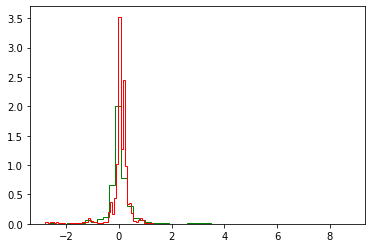

In [54]:
import numpy;

# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.hist(train_y, bins=50, normed=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, normed=1, color='red', histtype ='step');
plt.show()




In [55]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )


Test_MSE(MEAN):0.191127
Test_MSE(ZERO):0.190891


## Training the dataset

In [ ]:
import os
import tensorflow as tf
from tensorflow.core.protobuf import saver_pb2
import driving_data
import model

LOGDIR = './save'

sess = tf.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(model.y_, model.y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
# train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-3).minimize(loss) #task2
sess.run(tf.initialize_all_variables())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op =  tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 10 times
for epoch in range(epochs):
  for i in range(int(driving_data.num_images/batch_size)):
    xs, ys = driving_data.LoadTrainBatch(batch_size)
    train_step.run(feed_dict={model.x: xs, model.y_: ys, model.keep_prob: 0.8})
    if i % 10 == 0:
      xs, ys = driving_data.LoadValBatch(batch_size)
      loss_value = loss.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
      print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

    # write logs at every iteration
    summary = merged_summary_op.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
    summary_writer.add_summary(summary, epoch * driving_data.num_images/batch_size + i)

    if i % batch_size == 0:
      if not os.path.exists(LOGDIR):
        os.makedirs(LOGDIR)
      checkpoint_path = os.path.join(LOGDIR, "model.ckpt")
      filename = saver.save(sess, checkpoint_path)
  print("Model saved in file: %s" % filename)

print("Run the command line:\n" \
          "--> tensorboard --logdir=./logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")


D:\Installation\Anaconda\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0, Step: 0, Loss: 44.4973


W0923 09:49:32.421984  1056 saver.py:1134] *******************************************************
W0923 09:49:32.422986  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 09:49:32.427979  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 09:49:32.428982  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 09:49:32.431982  1056 saver.py:1138] now on by default.
W0923 09:49:32.434985  1056 saver.py:1139] *******************************************************


Epoch: 0, Step: 10, Loss: 35.4212
Epoch: 0, Step: 20, Loss: 34.7877
Epoch: 0, Step: 30, Loss: 34.1701
Epoch: 0, Step: 40, Loss: 33.6204
Epoch: 0, Step: 50, Loss: 33.2458
Epoch: 0, Step: 60, Loss: 33.5512
Epoch: 0, Step: 70, Loss: 33.7451
Epoch: 0, Step: 80, Loss: 31.6905
Epoch: 0, Step: 90, Loss: 30.9214
Epoch: 0, Step: 100, Loss: 30.381


W0923 09:54:01.153700  1056 saver.py:1134] *******************************************************
W0923 09:54:01.158698  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 09:54:01.165700  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 09:54:01.167702  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 09:54:01.180739  1056 saver.py:1138] now on by default.
W0923 09:54:01.184720  1056 saver.py:1139] *******************************************************


Epoch: 0, Step: 110, Loss: 29.8954
Epoch: 0, Step: 120, Loss: 29.3791
Epoch: 0, Step: 130, Loss: 28.9069
Epoch: 0, Step: 140, Loss: 28.5034
Epoch: 0, Step: 150, Loss: 28.0016
Epoch: 0, Step: 160, Loss: 27.4817
Epoch: 0, Step: 170, Loss: 27.1379
Epoch: 0, Step: 180, Loss: 26.96
Epoch: 0, Step: 190, Loss: 26.2018
Epoch: 0, Step: 200, Loss: 25.8343


W0923 09:58:46.532272  1056 saver.py:1134] *******************************************************
W0923 09:58:46.536267  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 09:58:46.539270  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 09:58:46.540306  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 09:58:46.545269  1056 saver.py:1138] now on by default.
W0923 09:58:46.551270  1056 saver.py:1139] *******************************************************


Epoch: 0, Step: 210, Loss: 25.2883
Epoch: 0, Step: 220, Loss: 24.8738
Epoch: 0, Step: 230, Loss: 24.4676
Epoch: 0, Step: 240, Loss: 24.0692
Epoch: 0, Step: 250, Loss: 23.684
Epoch: 0, Step: 260, Loss: 27.9846
Epoch: 0, Step: 270, Loss: 23.7162
Epoch: 0, Step: 280, Loss: 22.5476
Epoch: 0, Step: 290, Loss: 22.1764
Epoch: 0, Step: 300, Loss: 21.8177


W0923 10:03:04.311322  1056 saver.py:1134] *******************************************************
W0923 10:03:04.316323  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:03:04.318339  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:03:04.320324  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:03:04.321332  1056 saver.py:1138] now on by default.
W0923 10:03:04.330324  1056 saver.py:1139] *******************************************************


Epoch: 0, Step: 310, Loss: 21.4685
Epoch: 0, Step: 320, Loss: 21.1193
Epoch: 0, Step: 330, Loss: 20.7908
Epoch: 0, Step: 340, Loss: 20.4549
Epoch: 0, Step: 350, Loss: 20.1266
Epoch: 0, Step: 360, Loss: 19.8137
Epoch: 0, Step: 370, Loss: 19.5003
Epoch: 0, Step: 380, Loss: 19.1737
Epoch: 0, Step: 390, Loss: 18.8647
Epoch: 0, Step: 400, Loss: 18.5684


W0923 10:07:04.912949  1056 saver.py:1134] *******************************************************
W0923 10:07:04.914951  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:07:04.915952  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:07:04.916949  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:07:04.931951  1056 saver.py:1138] now on by default.
W0923 10:07:04.932952  1056 saver.py:1139] *******************************************************


Epoch: 0, Step: 410, Loss: 18.2997
Epoch: 0, Step: 420, Loss: 17.9966
Epoch: 0, Step: 430, Loss: 17.7253
Epoch: 0, Step: 440, Loss: 17.4387
Epoch: 0, Step: 450, Loss: 17.1622
Model saved in file: ./save\model.ckpt
Epoch: 1, Step: 100, Loss: 17.0625


W0923 10:09:06.315596  1056 saver.py:1134] *******************************************************
W0923 10:09:06.316597  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:09:06.318604  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:09:06.331592  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:09:06.332598  1056 saver.py:1138] now on by default.
W0923 10:09:06.347594  1056 saver.py:1139] *******************************************************


Epoch: 1, Step: 110, Loss: 16.7772
Epoch: 1, Step: 120, Loss: 16.5046
Epoch: 1, Step: 130, Loss: 16.2414
Epoch: 1, Step: 140, Loss: 15.9945
Epoch: 1, Step: 150, Loss: 15.7524
Epoch: 1, Step: 160, Loss: 15.4959
Epoch: 1, Step: 170, Loss: 15.2468
Epoch: 1, Step: 180, Loss: 15.0065
Epoch: 1, Step: 190, Loss: 14.7769
Epoch: 1, Step: 200, Loss: 14.6055


W0923 10:12:36.902360  1056 saver.py:1134] *******************************************************
W0923 10:12:36.903369  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:12:36.904368  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:12:36.906372  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:12:36.910365  1056 saver.py:1138] now on by default.
W0923 10:12:36.911371  1056 saver.py:1139] *******************************************************


Epoch: 1, Step: 210, Loss: 14.6543
Epoch: 1, Step: 220, Loss: 19.4106
Epoch: 1, Step: 230, Loss: 13.8949
Epoch: 1, Step: 240, Loss: 13.6595
Epoch: 1, Step: 250, Loss: 13.4674
Epoch: 1, Step: 260, Loss: 13.2818
Epoch: 1, Step: 270, Loss: 13.1005
Epoch: 1, Step: 280, Loss: 12.8357
Epoch: 1, Step: 290, Loss: 12.7794
Epoch: 1, Step: 300, Loss: 12.4926


W0923 10:17:08.114756  1056 saver.py:1134] *******************************************************
W0923 10:17:08.119754  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:17:08.120755  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:17:08.133756  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:17:08.137762  1056 saver.py:1138] now on by default.
W0923 10:17:08.140755  1056 saver.py:1139] *******************************************************


Epoch: 1, Step: 310, Loss: 12.2498
Epoch: 1, Step: 320, Loss: 12.1264
Epoch: 1, Step: 330, Loss: 11.8816
Epoch: 1, Step: 340, Loss: 11.7163
Epoch: 1, Step: 350, Loss: 11.545
Epoch: 1, Step: 360, Loss: 11.3956
Epoch: 1, Step: 370, Loss: 11.258
Epoch: 1, Step: 380, Loss: 11.191
Epoch: 1, Step: 390, Loss: 10.9364
Epoch: 1, Step: 400, Loss: 10.6766


W0923 10:21:07.839709  1056 saver.py:1134] *******************************************************
W0923 10:21:07.840744  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:21:07.841740  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:21:07.842741  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:21:07.843741  1056 saver.py:1138] now on by default.
W0923 10:21:07.844712  1056 saver.py:1139] *******************************************************


Epoch: 1, Step: 410, Loss: 10.5129
Epoch: 1, Step: 420, Loss: 10.3548
Epoch: 1, Step: 430, Loss: 10.2004
Epoch: 1, Step: 440, Loss: 10.0495
Epoch: 1, Step: 450, Loss: 9.89935
Epoch: 1, Step: 460, Loss: 9.75297
Epoch: 1, Step: 470, Loss: 9.61091
Epoch: 1, Step: 480, Loss: 9.47431
Epoch: 1, Step: 490, Loss: 9.3521
Epoch: 1, Step: 500, Loss: 9.19613


W0923 10:25:41.118115  1056 saver.py:1134] *******************************************************
W0923 10:25:41.121118  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:25:41.122136  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:25:41.124119  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:25:41.127126  1056 saver.py:1138] now on by default.
W0923 10:25:41.133129  1056 saver.py:1139] *******************************************************


Epoch: 1, Step: 510, Loss: 9.06017
Epoch: 1, Step: 520, Loss: 8.96713
Epoch: 1, Step: 530, Loss: 8.80324
Epoch: 1, Step: 540, Loss: 9.04246
Epoch: 1, Step: 550, Loss: 9.14492
Model saved in file: ./save\model.ckpt
Epoch: 2, Step: 200, Loss: 8.71096


W0923 10:28:12.529721  1056 saver.py:1134] *******************************************************
W0923 10:28:12.530725  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:28:12.531721  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:28:12.533723  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:28:12.538726  1056 saver.py:1138] now on by default.
W0923 10:28:12.541726  1056 saver.py:1139] *******************************************************


Epoch: 2, Step: 210, Loss: 8.40828
Epoch: 2, Step: 220, Loss: 8.26454
Epoch: 2, Step: 230, Loss: 8.14332
Epoch: 2, Step: 240, Loss: 8.16025
Epoch: 2, Step: 250, Loss: 9.00686
Epoch: 2, Step: 260, Loss: 9.16207
Epoch: 2, Step: 270, Loss: 7.74488
Epoch: 2, Step: 280, Loss: 7.65339
Epoch: 2, Step: 290, Loss: 7.45039
Epoch: 2, Step: 300, Loss: 7.35258


W0923 10:32:40.721148  1056 saver.py:1134] *******************************************************
W0923 10:32:40.723158  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:32:40.724155  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:32:40.726155  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:32:40.729154  1056 saver.py:1138] now on by default.
W0923 10:32:40.731154  1056 saver.py:1139] *******************************************************


Epoch: 2, Step: 310, Loss: 7.24735
Epoch: 2, Step: 320, Loss: 7.15943
Epoch: 2, Step: 330, Loss: 7.09587
Epoch: 2, Step: 340, Loss: 6.97359
Epoch: 2, Step: 350, Loss: 6.84855
Epoch: 2, Step: 360, Loss: 6.86806
Epoch: 2, Step: 370, Loss: 7.04625
Epoch: 2, Step: 380, Loss: 6.68553
Epoch: 2, Step: 390, Loss: 6.56004
Epoch: 2, Step: 400, Loss: 6.38212


W0923 10:36:15.767375  1056 saver.py:1134] *******************************************************
W0923 10:36:15.770355  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:36:15.771356  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:36:15.780354  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:36:15.783377  1056 saver.py:1138] now on by default.
W0923 10:36:15.788356  1056 saver.py:1139] *******************************************************


Epoch: 2, Step: 410, Loss: 6.29465
Epoch: 2, Step: 420, Loss: 6.20981
Epoch: 2, Step: 430, Loss: 6.12566
Epoch: 2, Step: 440, Loss: 6.12023
Epoch: 2, Step: 450, Loss: 11.7982
Epoch: 2, Step: 460, Loss: 6.1336
Epoch: 2, Step: 470, Loss: 5.8124
Epoch: 2, Step: 480, Loss: 5.72904
Epoch: 2, Step: 490, Loss: 5.65356
Epoch: 2, Step: 500, Loss: 5.59198


W0923 10:40:34.741702  1056 saver.py:1134] *******************************************************
W0923 10:40:34.743702  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:40:34.746703  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:40:34.749707  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:40:34.759707  1056 saver.py:1138] now on by default.
W0923 10:40:34.763703  1056 saver.py:1139] *******************************************************


Epoch: 2, Step: 510, Loss: 5.50348
Epoch: 2, Step: 520, Loss: 5.46132
Epoch: 2, Step: 530, Loss: 5.37222
Epoch: 2, Step: 540, Loss: 5.29641
Epoch: 2, Step: 550, Loss: 5.22779
Epoch: 2, Step: 560, Loss: 5.1651
Epoch: 2, Step: 570, Loss: 5.09614
Epoch: 2, Step: 580, Loss: 5.03746
Epoch: 2, Step: 590, Loss: 4.96833
Epoch: 2, Step: 600, Loss: 4.90396


W0923 10:44:35.518233  1056 saver.py:1134] *******************************************************
W0923 10:44:35.520243  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:44:35.522234  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:44:35.525240  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:44:35.528233  1056 saver.py:1138] now on by default.
W0923 10:44:35.530236  1056 saver.py:1139] *******************************************************


Epoch: 2, Step: 610, Loss: 4.83827
Epoch: 2, Step: 620, Loss: 4.78294
Epoch: 2, Step: 630, Loss: 4.71982
Epoch: 2, Step: 640, Loss: 4.6583
Epoch: 2, Step: 650, Loss: 4.6029
Model saved in file: ./save\model.ckpt
Epoch: 3, Step: 300, Loss: 4.57668


W0923 10:46:38.618192  1056 saver.py:1134] *******************************************************
W0923 10:46:38.619190  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:46:38.621192  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:46:38.622194  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:46:38.624190  1056 saver.py:1138] now on by default.
W0923 10:46:38.627202  1056 saver.py:1139] *******************************************************


Epoch: 3, Step: 310, Loss: 4.53247
Epoch: 3, Step: 320, Loss: 4.48377
Epoch: 3, Step: 330, Loss: 4.41846
Epoch: 3, Step: 340, Loss: 4.36225
Epoch: 3, Step: 350, Loss: 4.31361
Epoch: 3, Step: 360, Loss: 4.25961
Epoch: 3, Step: 370, Loss: 4.2081
Epoch: 3, Step: 380, Loss: 4.19088
Epoch: 3, Step: 390, Loss: 4.20087
Epoch: 3, Step: 400, Loss: 5.78358


W0923 10:50:21.759498  1056 saver.py:1134] *******************************************************
W0923 10:50:21.761536  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:50:21.767508  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:50:21.772505  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:50:21.773511  1056 saver.py:1138] now on by default.
W0923 10:50:21.776504  1056 saver.py:1139] *******************************************************


Epoch: 3, Step: 410, Loss: 8.46601
Epoch: 3, Step: 420, Loss: 4.00852
Epoch: 3, Step: 430, Loss: 3.93776
Epoch: 3, Step: 440, Loss: 3.8885
Epoch: 3, Step: 450, Loss: 3.84986
Epoch: 3, Step: 460, Loss: 3.81569
Epoch: 3, Step: 470, Loss: 3.80441
Epoch: 3, Step: 480, Loss: 3.89272
Epoch: 3, Step: 490, Loss: 3.68306
Epoch: 3, Step: 500, Loss: 3.63676


W0923 10:54:09.688301  1056 saver.py:1134] *******************************************************
W0923 10:54:09.689307  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:54:09.691307  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:54:09.692319  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:54:09.694307  1056 saver.py:1138] now on by default.
W0923 10:54:09.696305  1056 saver.py:1139] *******************************************************


Epoch: 3, Step: 510, Loss: 3.61167
Epoch: 3, Step: 520, Loss: 3.55694
Epoch: 3, Step: 530, Loss: 3.54394
Epoch: 3, Step: 540, Loss: 3.51397
Epoch: 3, Step: 550, Loss: 3.51888
Epoch: 3, Step: 560, Loss: 3.46197
Epoch: 3, Step: 570, Loss: 3.4868
Epoch: 3, Step: 580, Loss: 3.3608
Epoch: 3, Step: 590, Loss: 3.3168
Epoch: 3, Step: 600, Loss: 3.27326


W0923 10:57:28.112783  1056 saver.py:1134] *******************************************************
W0923 10:57:28.113784  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 10:57:28.114787  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 10:57:28.122795  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 10:57:28.123786  1056 saver.py:1138] now on by default.
W0923 10:57:28.126786  1056 saver.py:1139] *******************************************************


Epoch: 3, Step: 610, Loss: 3.23795
Epoch: 3, Step: 620, Loss: 3.20881
Epoch: 3, Step: 630, Loss: 3.17859
Epoch: 3, Step: 640, Loss: 3.14849
Epoch: 3, Step: 650, Loss: 3.16075
Epoch: 3, Step: 660, Loss: 3.11425
Epoch: 3, Step: 670, Loss: 3.05929
Epoch: 3, Step: 680, Loss: 3.02009
Epoch: 3, Step: 690, Loss: 3.00781
Epoch: 3, Step: 700, Loss: 2.96356


W0923 11:00:49.363569  1056 saver.py:1134] *******************************************************
W0923 11:00:49.364569  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:00:49.365572  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:00:49.366573  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:00:49.367570  1056 saver.py:1138] now on by default.
W0923 11:00:49.376577  1056 saver.py:1139] *******************************************************


Epoch: 3, Step: 710, Loss: 2.96447
Epoch: 3, Step: 720, Loss: 2.95327
Epoch: 3, Step: 730, Loss: 3.2222
Epoch: 3, Step: 740, Loss: 2.93709
Epoch: 3, Step: 750, Loss: 2.96132
Model saved in file: ./save\model.ckpt
Epoch: 4, Step: 400, Loss: 2.83764


W0923 11:02:48.964729  1056 saver.py:1134] *******************************************************
W0923 11:02:48.966770  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:02:48.968734  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:02:48.983740  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:02:48.986733  1056 saver.py:1138] now on by default.
W0923 11:02:48.996732  1056 saver.py:1139] *******************************************************


Epoch: 4, Step: 410, Loss: 2.80614
Epoch: 4, Step: 420, Loss: 2.86525
Epoch: 4, Step: 430, Loss: 2.89627
Epoch: 4, Step: 440, Loss: 3.73874
Epoch: 4, Step: 450, Loss: 3.70321
Epoch: 4, Step: 460, Loss: 2.72234
Epoch: 4, Step: 470, Loss: 2.6929
Epoch: 4, Step: 480, Loss: 2.6529
Epoch: 4, Step: 490, Loss: 2.63706
Epoch: 4, Step: 500, Loss: 2.60579


W0923 11:06:33.427308  1056 saver.py:1134] *******************************************************
W0923 11:06:33.429348  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:06:33.435311  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:06:33.439312  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:06:33.440353  1056 saver.py:1138] now on by default.
W0923 11:06:33.447312  1056 saver.py:1139] *******************************************************


Epoch: 4, Step: 510, Loss: 2.57082
Epoch: 4, Step: 520, Loss: 2.56332
Epoch: 4, Step: 530, Loss: 2.53943
Epoch: 4, Step: 540, Loss: 2.53401
Epoch: 4, Step: 550, Loss: 2.60315
Epoch: 4, Step: 560, Loss: 2.88003
Epoch: 4, Step: 570, Loss: 2.72316
Epoch: 4, Step: 580, Loss: 2.44824
Epoch: 4, Step: 590, Loss: 2.41735
Epoch: 4, Step: 600, Loss: 2.39833


W0923 11:11:08.481746  1056 saver.py:1134] *******************************************************
W0923 11:11:08.482765  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:11:08.489745  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:11:08.492745  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:11:08.495746  1056 saver.py:1138] now on by default.
W0923 11:11:08.496746  1056 saver.py:1139] *******************************************************


Epoch: 4, Step: 610, Loss: 2.38214
Epoch: 4, Step: 620, Loss: 2.36317
Epoch: 4, Step: 630, Loss: 2.83991
Epoch: 4, Step: 640, Loss: 7.4463
Epoch: 4, Step: 650, Loss: 2.35785
Epoch: 4, Step: 660, Loss: 2.30739
Epoch: 4, Step: 670, Loss: 2.28301
Epoch: 4, Step: 680, Loss: 2.2677
Epoch: 4, Step: 690, Loss: 2.26794
Epoch: 4, Step: 700, Loss: 2.27015


W0923 11:15:11.958208  1056 saver.py:1134] *******************************************************
W0923 11:15:11.959208  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:15:11.960207  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:15:11.961209  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:15:11.963209  1056 saver.py:1138] now on by default.
W0923 11:15:11.965208  1056 saver.py:1139] *******************************************************


Epoch: 4, Step: 710, Loss: 2.30629
Epoch: 4, Step: 720, Loss: 2.2081
Epoch: 4, Step: 730, Loss: 2.19366
Epoch: 4, Step: 740, Loss: 2.23778
Epoch: 4, Step: 750, Loss: 2.54579
Epoch: 4, Step: 760, Loss: 2.24571
Epoch: 4, Step: 770, Loss: 2.3478
Epoch: 4, Step: 780, Loss: 3.04002
Epoch: 4, Step: 790, Loss: 2.31849
Epoch: 4, Step: 800, Loss: 2.13342


W0923 11:19:01.194091  1056 saver.py:1134] *******************************************************
W0923 11:19:01.196089  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:19:01.198121  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:19:01.200092  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:19:01.204090  1056 saver.py:1138] now on by default.
W0923 11:19:01.221087  1056 saver.py:1139] *******************************************************


Epoch: 4, Step: 810, Loss: 2.1639
Epoch: 4, Step: 820, Loss: 2.07167
Epoch: 4, Step: 830, Loss: 2.06408
Epoch: 4, Step: 840, Loss: 2.07446
Epoch: 4, Step: 850, Loss: 2.05857
Model saved in file: ./save\model.ckpt
Epoch: 5, Step: 500, Loss: 2.05812


W0923 11:20:59.732580  1056 saver.py:1134] *******************************************************
W0923 11:20:59.733583  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:20:59.734581  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:20:59.735582  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:20:59.738585  1056 saver.py:1138] now on by default.
W0923 11:20:59.741584  1056 saver.py:1139] *******************************************************


Epoch: 5, Step: 510, Loss: 2.04108
Epoch: 5, Step: 520, Loss: 2.01058
Epoch: 5, Step: 530, Loss: 2.00261
Epoch: 5, Step: 540, Loss: 1.99142
Epoch: 5, Step: 550, Loss: 1.9827
Epoch: 5, Step: 560, Loss: 1.97151
Epoch: 5, Step: 570, Loss: 1.96637
Epoch: 5, Step: 580, Loss: 2.00296
Epoch: 5, Step: 590, Loss: 4.54832
Epoch: 5, Step: 600, Loss: 4.72183


W0923 11:24:35.238100  1056 saver.py:1134] *******************************************************
W0923 11:24:35.240109  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:24:35.243103  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:24:35.244105  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:24:35.249102  1056 saver.py:1138] now on by default.
W0923 11:24:35.251123  1056 saver.py:1139] *******************************************************


Epoch: 5, Step: 610, Loss: 1.92315
Epoch: 5, Step: 620, Loss: 1.91022
Epoch: 5, Step: 630, Loss: 1.94621
Epoch: 5, Step: 640, Loss: 1.94975
Epoch: 5, Step: 650, Loss: 1.92928
Epoch: 5, Step: 660, Loss: 1.92118
Epoch: 5, Step: 670, Loss: 1.93545
Epoch: 5, Step: 680, Loss: 1.86371
Epoch: 5, Step: 690, Loss: 1.86674
Epoch: 5, Step: 700, Loss: 1.85871


W0923 11:28:19.667664  1056 saver.py:1134] *******************************************************
W0923 11:28:19.668669  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:28:19.669673  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:28:19.670675  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:28:19.678678  1056 saver.py:1138] now on by default.
W0923 11:28:19.681673  1056 saver.py:1139] *******************************************************


Epoch: 5, Step: 710, Loss: 1.84399
Epoch: 5, Step: 720, Loss: 1.82981
Epoch: 5, Step: 730, Loss: 1.88693
Epoch: 5, Step: 740, Loss: 1.86767
Epoch: 5, Step: 750, Loss: 1.86457
Epoch: 5, Step: 760, Loss: 1.89188
Epoch: 5, Step: 770, Loss: 1.78844
Epoch: 5, Step: 780, Loss: 1.82456
Epoch: 5, Step: 790, Loss: 2.9558
Epoch: 5, Step: 800, Loss: 2.14916


W0923 11:31:54.568327  1056 saver.py:1134] *******************************************************
W0923 11:31:54.569334  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:31:54.573333  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:31:54.575336  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:31:54.578334  1056 saver.py:1138] now on by default.
W0923 11:31:54.580330  1056 saver.py:1139] *******************************************************


Epoch: 5, Step: 810, Loss: 1.9019
Epoch: 5, Step: 820, Loss: 1.75071
Epoch: 5, Step: 830, Loss: 1.73486
Epoch: 5, Step: 840, Loss: 1.72832
Epoch: 5, Step: 850, Loss: 1.72599
Epoch: 5, Step: 860, Loss: 1.72204
Epoch: 5, Step: 870, Loss: 1.72
Epoch: 5, Step: 880, Loss: 1.70568
Epoch: 5, Step: 890, Loss: 1.74677
Epoch: 5, Step: 900, Loss: 1.7572


W0923 11:36:16.385967  1056 saver.py:1134] *******************************************************
W0923 11:36:16.387969  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:36:16.391974  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:36:16.394972  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:36:16.397973  1056 saver.py:1138] now on by default.
W0923 11:36:16.400975  1056 saver.py:1139] *******************************************************


Epoch: 5, Step: 910, Loss: 1.71383
Epoch: 5, Step: 920, Loss: 2.17682
Epoch: 5, Step: 930, Loss: 2.13896
Epoch: 5, Step: 940, Loss: 1.80189
Epoch: 5, Step: 950, Loss: 1.69496
Model saved in file: ./save\model.ckpt
Epoch: 6, Step: 600, Loss: 1.67229


W0923 11:38:12.815086  1056 saver.py:1134] *******************************************************
W0923 11:38:12.816087  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:38:12.819087  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:38:12.821094  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:38:12.823094  1056 saver.py:1138] now on by default.
W0923 11:38:12.825095  1056 saver.py:1139] *******************************************************


Epoch: 6, Step: 610, Loss: 1.69846
Epoch: 6, Step: 620, Loss: 2.01254
Epoch: 6, Step: 630, Loss: 3.07658
Epoch: 6, Step: 640, Loss: 2.37143
Epoch: 6, Step: 650, Loss: 1.69963
Epoch: 6, Step: 660, Loss: 1.64356
Epoch: 6, Step: 670, Loss: 1.61671
Epoch: 6, Step: 680, Loss: 1.60414
Epoch: 6, Step: 690, Loss: 1.60545
Epoch: 6, Step: 700, Loss: 1.62276


W0923 11:42:08.979459  1056 saver.py:1134] *******************************************************
W0923 11:42:08.984464  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:42:08.999459  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:42:09.002473  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:42:09.005464  1056 saver.py:1138] now on by default.
W0923 11:42:09.008464  1056 saver.py:1139] *******************************************************


Epoch: 6, Step: 710, Loss: 1.66344
Epoch: 6, Step: 720, Loss: 1.58162
Epoch: 6, Step: 730, Loss: 1.62833
Epoch: 6, Step: 740, Loss: 1.70185
Epoch: 6, Step: 750, Loss: 1.8852
Epoch: 6, Step: 760, Loss: 2.04281
Epoch: 6, Step: 770, Loss: 1.62725
Epoch: 6, Step: 780, Loss: 1.56563
Epoch: 6, Step: 790, Loss: 1.57149
Epoch: 6, Step: 800, Loss: 1.91213


W0923 11:46:04.117291  1056 saver.py:1134] *******************************************************
W0923 11:46:04.118291  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:46:04.120300  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:46:04.123285  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:46:04.124287  1056 saver.py:1138] now on by default.
W0923 11:46:04.128287  1056 saver.py:1139] *******************************************************


Epoch: 6, Step: 810, Loss: 1.53491
Epoch: 6, Step: 820, Loss: 3.22934
Epoch: 6, Step: 830, Loss: 5.93422
Epoch: 6, Step: 840, Loss: 1.53998
Epoch: 6, Step: 850, Loss: 1.52644
Epoch: 6, Step: 860, Loss: 1.5162
Epoch: 6, Step: 870, Loss: 1.50694
Epoch: 6, Step: 880, Loss: 1.51266
Epoch: 6, Step: 890, Loss: 1.50967
Epoch: 6, Step: 900, Loss: 1.50955


W0923 11:50:06.502030  1056 saver.py:1134] *******************************************************
W0923 11:50:06.504037  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:50:06.505065  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:50:06.506065  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:50:06.512036  1056 saver.py:1138] now on by default.
W0923 11:50:06.514036  1056 saver.py:1139] *******************************************************


Epoch: 6, Step: 910, Loss: 1.51385
Epoch: 6, Step: 920, Loss: 1.51032
Epoch: 6, Step: 930, Loss: 1.49193
Epoch: 6, Step: 940, Loss: 1.48791
Epoch: 6, Step: 950, Loss: 1.48534
Epoch: 6, Step: 960, Loss: 1.47827
Epoch: 6, Step: 970, Loss: 1.47548
Epoch: 6, Step: 980, Loss: 1.46594
Epoch: 6, Step: 990, Loss: 1.46267
Epoch: 6, Step: 1000, Loss: 1.45886


W0923 11:53:49.152637  1056 saver.py:1134] *******************************************************
W0923 11:53:49.154637  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:53:49.155633  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:53:49.158636  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:53:49.161634  1056 saver.py:1138] now on by default.
W0923 11:53:49.167637  1056 saver.py:1139] *******************************************************


Epoch: 6, Step: 1010, Loss: 1.45479
Epoch: 6, Step: 1020, Loss: 1.45108
Epoch: 6, Step: 1030, Loss: 1.44247
Epoch: 6, Step: 1040, Loss: 1.43801
Epoch: 6, Step: 1050, Loss: 1.43851
Model saved in file: ./save\model.ckpt
Epoch: 7, Step: 700, Loss: 1.43422


W0923 11:55:57.614484  1056 saver.py:1134] *******************************************************
W0923 11:55:57.616482  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:55:57.617484  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:55:57.618481  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:55:57.624491  1056 saver.py:1138] now on by default.
W0923 11:55:57.628483  1056 saver.py:1139] *******************************************************


Epoch: 7, Step: 710, Loss: 1.43193
Epoch: 7, Step: 720, Loss: 1.43823
Epoch: 7, Step: 730, Loss: 1.42312
Epoch: 7, Step: 740, Loss: 1.41864
Epoch: 7, Step: 750, Loss: 1.40941
Epoch: 7, Step: 760, Loss: 1.461
Epoch: 7, Step: 770, Loss: 1.46987
Epoch: 7, Step: 780, Loss: 5.74154
Epoch: 7, Step: 790, Loss: 3.40972
Epoch: 7, Step: 800, Loss: 1.39891


W0923 11:59:39.299587  1056 saver.py:1134] *******************************************************
W0923 11:59:39.301591  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 11:59:39.303585  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 11:59:39.305586  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 11:59:39.308588  1056 saver.py:1138] now on by default.
W0923 11:59:39.310588  1056 saver.py:1139] *******************************************************


Epoch: 7, Step: 810, Loss: 1.45649
Epoch: 7, Step: 820, Loss: 1.39047
Epoch: 7, Step: 830, Loss: 1.40141
Epoch: 7, Step: 840, Loss: 1.38086
Epoch: 7, Step: 850, Loss: 1.48697
Epoch: 7, Step: 860, Loss: 1.50769
Epoch: 7, Step: 870, Loss: 1.36391
Epoch: 7, Step: 880, Loss: 1.42108
Epoch: 7, Step: 890, Loss: 1.36932
Epoch: 7, Step: 900, Loss: 1.36516


W0923 12:03:41.745693  1056 saver.py:1134] *******************************************************
W0923 12:03:41.746699  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:03:41.747741  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:03:41.750699  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:03:41.753696  1056 saver.py:1138] now on by default.
W0923 12:03:41.756695  1056 saver.py:1139] *******************************************************


Epoch: 7, Step: 910, Loss: 1.34688
Epoch: 7, Step: 920, Loss: 1.42924
Epoch: 7, Step: 930, Loss: 1.37433
Epoch: 7, Step: 940, Loss: 1.48036
Epoch: 7, Step: 950, Loss: 1.43891
Epoch: 7, Step: 960, Loss: 1.34779
Epoch: 7, Step: 970, Loss: 1.33271
Epoch: 7, Step: 980, Loss: 1.32477
Epoch: 7, Step: 990, Loss: 1.31671
Epoch: 7, Step: 1000, Loss: 1.31421


W0923 12:07:35.854307  1056 saver.py:1134] *******************************************************
W0923 12:07:35.856343  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:07:35.859312  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:07:35.862315  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:07:35.864316  1056 saver.py:1138] now on by default.
W0923 12:07:35.867316  1056 saver.py:1139] *******************************************************


Epoch: 7, Step: 1010, Loss: 1.31036
Epoch: 7, Step: 1020, Loss: 1.30722
Epoch: 7, Step: 1030, Loss: 1.30349
Epoch: 7, Step: 1040, Loss: 1.31105
Epoch: 7, Step: 1050, Loss: 1.31066
Epoch: 7, Step: 1060, Loss: 1.30087
Epoch: 7, Step: 1070, Loss: 1.29161
Epoch: 7, Step: 1080, Loss: 1.31654
Epoch: 7, Step: 1090, Loss: 1.31375
Epoch: 7, Step: 1100, Loss: 1.40046


W0923 12:11:30.652170  1056 saver.py:1134] *******************************************************
W0923 12:11:30.653202  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:11:30.654172  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:11:30.655171  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:11:30.657177  1056 saver.py:1138] now on by default.
W0923 12:11:30.663176  1056 saver.py:1139] *******************************************************


Epoch: 7, Step: 1110, Loss: 1.79402
Epoch: 7, Step: 1120, Loss: 1.59882
Epoch: 7, Step: 1130, Loss: 1.34527
Epoch: 7, Step: 1140, Loss: 1.26809
Epoch: 7, Step: 1150, Loss: 1.26992
Model saved in file: ./save\model.ckpt
Epoch: 8, Step: 800, Loss: 1.33827


W0923 12:13:34.533447  1056 saver.py:1134] *******************************************************
W0923 12:13:34.534454  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:13:34.539450  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:13:34.541457  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:13:34.543451  1056 saver.py:1138] now on by default.
W0923 12:13:34.545452  1056 saver.py:1139] *******************************************************


Epoch: 8, Step: 810, Loss: 1.68931
Epoch: 8, Step: 820, Loss: 2.94574
Epoch: 8, Step: 830, Loss: 1.56657
Epoch: 8, Step: 840, Loss: 1.30254
Epoch: 8, Step: 850, Loss: 1.27507
Epoch: 8, Step: 860, Loss: 1.2611
Epoch: 8, Step: 870, Loss: 1.2552
Epoch: 8, Step: 880, Loss: 1.23888
Epoch: 8, Step: 890, Loss: 1.29323
Epoch: 8, Step: 900, Loss: 1.32701


W0923 12:17:06.550370  1056 saver.py:1134] *******************************************************
W0923 12:17:06.551370  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:17:06.552371  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:17:06.554374  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:17:06.555377  1056 saver.py:1138] now on by default.
W0923 12:17:06.561378  1056 saver.py:1139] *******************************************************


Epoch: 8, Step: 910, Loss: 1.23371
Epoch: 8, Step: 920, Loss: 1.2818
Epoch: 8, Step: 930, Loss: 1.47832
Epoch: 8, Step: 940, Loss: 1.38172
Epoch: 8, Step: 950, Loss: 1.40195
Epoch: 8, Step: 960, Loss: 1.22553
Epoch: 8, Step: 970, Loss: 1.21295
Epoch: 8, Step: 980, Loss: 1.20033
Epoch: 8, Step: 990, Loss: 1.19264
Epoch: 8, Step: 1000, Loss: 1.19346


W0923 12:20:28.372849  1056 saver.py:1134] *******************************************************
W0923 12:20:28.373854  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:20:28.375851  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:20:28.377856  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:20:28.379859  1056 saver.py:1138] now on by default.
W0923 12:20:28.383852  1056 saver.py:1139] *******************************************************


Epoch: 8, Step: 1010, Loss: 4.25467
Epoch: 8, Step: 1020, Loss: 3.88092
Epoch: 8, Step: 1030, Loss: 1.18519
Epoch: 8, Step: 1040, Loss: 1.17682
Epoch: 8, Step: 1050, Loss: 1.17164
Epoch: 8, Step: 1060, Loss: 1.17773
Epoch: 8, Step: 1070, Loss: 1.16609
Epoch: 8, Step: 1080, Loss: 1.1748
Epoch: 8, Step: 1090, Loss: 1.18951
Epoch: 8, Step: 1100, Loss: 1.1773


W0923 12:24:45.241710  1056 saver.py:1134] *******************************************************
W0923 12:24:45.243711  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:24:45.244712  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:24:45.247711  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:24:45.252713  1056 saver.py:1138] now on by default.
W0923 12:24:45.254713  1056 saver.py:1139] *******************************************************


Epoch: 8, Step: 1110, Loss: 1.17869
Epoch: 8, Step: 1120, Loss: 1.18084
Epoch: 8, Step: 1130, Loss: 1.2786
Epoch: 8, Step: 1140, Loss: 1.17583
Epoch: 8, Step: 1150, Loss: 1.24146
Epoch: 8, Step: 1160, Loss: 1.38621
Epoch: 8, Step: 1170, Loss: 1.20229
Epoch: 8, Step: 1180, Loss: 2.41491
Epoch: 8, Step: 1190, Loss: 1.24047
Epoch: 8, Step: 1200, Loss: 1.14642


W0923 12:28:54.769814  1056 saver.py:1134] *******************************************************
W0923 12:28:54.771852  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:28:54.773827  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:28:54.776825  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:28:54.778818  1056 saver.py:1138] now on by default.
W0923 12:28:54.781820  1056 saver.py:1139] *******************************************************


Epoch: 8, Step: 1210, Loss: 1.21948
Epoch: 8, Step: 1220, Loss: 1.13065
Epoch: 8, Step: 1230, Loss: 1.13031
Epoch: 8, Step: 1240, Loss: 1.13787
Epoch: 8, Step: 1250, Loss: 1.12636
Model saved in file: ./save\model.ckpt
Epoch: 9, Step: 900, Loss: 1.1289


W0923 12:31:07.893620  1056 saver.py:1134] *******************************************************
W0923 12:31:07.896618  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:31:07.901623  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:31:07.905621  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:31:07.906623  1056 saver.py:1138] now on by default.
W0923 12:31:07.909622  1056 saver.py:1139] *******************************************************


Epoch: 9, Step: 910, Loss: 1.12034
Epoch: 9, Step: 920, Loss: 1.11405
Epoch: 9, Step: 930, Loss: 1.1042
Epoch: 9, Step: 940, Loss: 1.10709
Epoch: 9, Step: 950, Loss: 1.15983
Epoch: 9, Step: 960, Loss: 1.11429
Epoch: 9, Step: 970, Loss: 6.0379
Epoch: 9, Step: 980, Loss: 1.5414
Epoch: 9, Step: 990, Loss: 1.08326
Epoch: 9, Step: 1000, Loss: 1.09389


W0923 12:35:17.793237  1056 saver.py:1134] *******************************************************
W0923 12:35:17.794276  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:35:17.795243  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:35:17.796243  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:35:17.800244  1056 saver.py:1138] now on by default.
W0923 12:35:17.804242  1056 saver.py:1139] *******************************************************


Epoch: 9, Step: 1010, Loss: 1.11138
Epoch: 9, Step: 1020, Loss: 1.1259
Epoch: 9, Step: 1030, Loss: 1.0763
Epoch: 9, Step: 1040, Loss: 1.17751
Epoch: 9, Step: 1050, Loss: 1.15175
Epoch: 9, Step: 1060, Loss: 1.06244
Epoch: 9, Step: 1070, Loss: 1.10534
Epoch: 9, Step: 1080, Loss: 1.06852
Epoch: 9, Step: 1090, Loss: 1.06834
Epoch: 9, Step: 1100, Loss: 1.05453


W0923 12:39:31.677734  1056 saver.py:1134] *******************************************************
W0923 12:39:31.679756  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:39:31.684728  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:39:31.686727  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:39:31.689727  1056 saver.py:1138] now on by default.
W0923 12:39:31.692724  1056 saver.py:1139] *******************************************************


Epoch: 9, Step: 1110, Loss: 1.15618
Epoch: 9, Step: 1120, Loss: 1.07283
Epoch: 9, Step: 1130, Loss: 1.15303
Epoch: 9, Step: 1140, Loss: 1.08617
Epoch: 9, Step: 1150, Loss: 1.11481
Epoch: 9, Step: 1160, Loss: 1.03531
Epoch: 9, Step: 1170, Loss: 1.02972
Epoch: 9, Step: 1180, Loss: 1.05193
Epoch: 9, Step: 1190, Loss: 1.02575
Epoch: 9, Step: 1200, Loss: 1.02603


W0923 12:43:50.434241  1056 saver.py:1134] *******************************************************
W0923 12:43:50.436243  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:43:50.440248  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:43:50.442248  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:43:50.444248  1056 saver.py:1138] now on by default.
W0923 12:43:50.447249  1056 saver.py:1139] *******************************************************


Epoch: 9, Step: 1210, Loss: 1.01902
Epoch: 9, Step: 1220, Loss: 1.07131
Epoch: 9, Step: 1230, Loss: 1.01707
Epoch: 9, Step: 1240, Loss: 1.01434
Epoch: 9, Step: 1250, Loss: 1.01371
Epoch: 9, Step: 1260, Loss: 1.01474
Epoch: 9, Step: 1270, Loss: 1.03083
Epoch: 9, Step: 1280, Loss: 1.01502
Epoch: 9, Step: 1290, Loss: 1.20805
Epoch: 9, Step: 1300, Loss: 1.46963


W0923 12:47:04.277191  1056 saver.py:1134] *******************************************************
W0923 12:47:04.282191  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:47:04.286191  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:47:04.288192  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:47:04.290193  1056 saver.py:1138] now on by default.
W0923 12:47:04.292196  1056 saver.py:1139] *******************************************************


Epoch: 9, Step: 1310, Loss: 1.19092
Epoch: 9, Step: 1320, Loss: 1.04166
Epoch: 9, Step: 1330, Loss: 0.999657
Epoch: 9, Step: 1340, Loss: 0.990686
Epoch: 9, Step: 1350, Loss: 1.09326
Model saved in file: ./save\model.ckpt
Epoch: 10, Step: 1000, Loss: 1.69485


W0923 12:48:53.275774  1056 saver.py:1134] *******************************************************
W0923 12:48:53.276776  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:48:53.278774  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:48:53.290778  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:48:53.293781  1056 saver.py:1138] now on by default.
W0923 12:48:53.297779  1056 saver.py:1139] *******************************************************


Epoch: 10, Step: 1010, Loss: 2.33165
Epoch: 10, Step: 1020, Loss: 1.23163
Epoch: 10, Step: 1030, Loss: 1.04112
Epoch: 10, Step: 1040, Loss: 0.969166
Epoch: 10, Step: 1050, Loss: 0.979155
Epoch: 10, Step: 1060, Loss: 0.97037
Epoch: 10, Step: 1070, Loss: 0.96882
Epoch: 10, Step: 1080, Loss: 0.976493
Epoch: 10, Step: 1090, Loss: 1.00241
Epoch: 10, Step: 1100, Loss: 0.959941


W0923 12:52:10.326150  1056 saver.py:1134] *******************************************************
W0923 12:52:10.327153  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:52:10.332154  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:52:10.337151  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:52:10.341156  1056 saver.py:1138] now on by default.
W0923 12:52:10.342155  1056 saver.py:1139] *******************************************************


Epoch: 10, Step: 1110, Loss: 1.03576
Epoch: 10, Step: 1120, Loss: 1.31398
Epoch: 10, Step: 1130, Loss: 1.06488
Epoch: 10, Step: 1140, Loss: 1.16371
Epoch: 10, Step: 1150, Loss: 0.951201
Epoch: 10, Step: 1160, Loss: 0.951923
Epoch: 10, Step: 1170, Loss: 0.952505
Epoch: 10, Step: 1180, Loss: 0.95279
Epoch: 10, Step: 1190, Loss: 1.04589
Epoch: 10, Step: 1200, Loss: 7.47825


W0923 12:55:25.192754  1056 saver.py:1134] *******************************************************
W0923 12:55:25.197755  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:55:25.200754  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:55:25.202766  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:55:25.205777  1056 saver.py:1138] now on by default.
W0923 12:55:25.207774  1056 saver.py:1139] *******************************************************


Epoch: 10, Step: 1210, Loss: 2.27966
Epoch: 10, Step: 1220, Loss: 0.980959
Epoch: 10, Step: 1230, Loss: 1.03269
Epoch: 10, Step: 1240, Loss: 0.916573
Epoch: 10, Step: 1250, Loss: 0.916013
Epoch: 10, Step: 1260, Loss: 0.914806
Epoch: 10, Step: 1270, Loss: 0.926254
Epoch: 10, Step: 1280, Loss: 0.917287
Epoch: 10, Step: 1290, Loss: 0.914218
Epoch: 10, Step: 1300, Loss: 0.907346


W0923 12:58:42.237097  1056 saver.py:1134] *******************************************************
W0923 12:58:42.238098  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 12:58:42.241097  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 12:58:42.246102  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 12:58:42.247101  1056 saver.py:1138] now on by default.
W0923 12:58:42.248100  1056 saver.py:1139] *******************************************************


Epoch: 10, Step: 1310, Loss: 0.910993
Epoch: 10, Step: 1320, Loss: 0.902946
Epoch: 10, Step: 1330, Loss: 0.907594
Epoch: 10, Step: 1340, Loss: 0.900715
Epoch: 10, Step: 1350, Loss: 0.896784
Epoch: 10, Step: 1360, Loss: 0.886279
Epoch: 10, Step: 1370, Loss: 0.891446
Epoch: 10, Step: 1380, Loss: 0.886407
Epoch: 10, Step: 1390, Loss: 0.882948
Epoch: 10, Step: 1400, Loss: 0.885152


W0923 13:01:59.393710  1056 saver.py:1134] *******************************************************
W0923 13:01:59.395710  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:01:59.396720  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:01:59.398718  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:01:59.406714  1056 saver.py:1138] now on by default.
W0923 13:01:59.408750  1056 saver.py:1139] *******************************************************


Epoch: 10, Step: 1410, Loss: 0.876004
Epoch: 10, Step: 1420, Loss: 0.876529
Epoch: 10, Step: 1430, Loss: 0.880092
Epoch: 10, Step: 1440, Loss: 0.86941
Epoch: 10, Step: 1450, Loss: 0.867285
Model saved in file: ./save\model.ckpt
Epoch: 11, Step: 1100, Loss: 0.863477


W0923 13:04:09.676670  1056 saver.py:1134] *******************************************************
W0923 13:04:09.677709  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:04:09.679676  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:04:09.684675  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:04:09.686676  1056 saver.py:1138] now on by default.
W0923 13:04:09.691673  1056 saver.py:1139] *******************************************************


Epoch: 11, Step: 1110, Loss: 0.863698
Epoch: 11, Step: 1120, Loss: 0.861576
Epoch: 11, Step: 1130, Loss: 0.860866
Epoch: 11, Step: 1140, Loss: 0.928386
Epoch: 11, Step: 1150, Loss: 0.969629
Epoch: 11, Step: 1160, Loss: 6.07181
Epoch: 11, Step: 1170, Loss: 0.86465
Epoch: 11, Step: 1180, Loss: 0.85525
Epoch: 11, Step: 1190, Loss: 0.848538
Epoch: 11, Step: 1200, Loss: 0.899933


W0923 13:09:59.219391  1056 saver.py:1134] *******************************************************
W0923 13:09:59.226395  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:09:59.234397  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:09:59.237392  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:09:59.240395  1056 saver.py:1138] now on by default.
W0923 13:09:59.245393  1056 saver.py:1139] *******************************************************


Epoch: 11, Step: 1210, Loss: 2.32494
Epoch: 11, Step: 1220, Loss: 0.846327
Epoch: 11, Step: 1230, Loss: 1.0009
Epoch: 11, Step: 1240, Loss: 0.917288
Epoch: 11, Step: 1250, Loss: 0.835922
Epoch: 11, Step: 1260, Loss: 0.915556
Epoch: 11, Step: 1270, Loss: 0.825178
Epoch: 11, Step: 1280, Loss: 0.859035
Epoch: 11, Step: 1290, Loss: 0.840635
Epoch: 11, Step: 1300, Loss: 0.903645


W0923 13:14:47.393352  1056 saver.py:1134] *******************************************************
W0923 13:14:47.397353  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:14:47.399356  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:14:47.403355  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:14:47.406355  1056 saver.py:1138] now on by default.
W0923 13:14:47.412353  1056 saver.py:1139] *******************************************************


Epoch: 11, Step: 1310, Loss: 0.848738
Epoch: 11, Step: 1320, Loss: 0.958497
Epoch: 11, Step: 1330, Loss: 0.883986
Epoch: 11, Step: 1340, Loss: 0.823747
Epoch: 11, Step: 1350, Loss: 0.81498
Epoch: 11, Step: 1360, Loss: 0.81171
Epoch: 11, Step: 1370, Loss: 0.811112
Epoch: 11, Step: 1380, Loss: 0.80552
Epoch: 11, Step: 1390, Loss: 0.80112
Epoch: 11, Step: 1400, Loss: 0.799308


W0923 13:20:07.891818  1056 saver.py:1134] *******************************************************
W0923 13:20:07.897802  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:20:07.902808  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:20:07.906802  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:20:07.909804  1056 saver.py:1138] now on by default.
W0923 13:20:07.917803  1056 saver.py:1139] *******************************************************


Epoch: 11, Step: 1410, Loss: 0.799794
Epoch: 11, Step: 1420, Loss: 0.800713
Epoch: 11, Step: 1430, Loss: 0.803875
Epoch: 11, Step: 1440, Loss: 0.791144
Epoch: 11, Step: 1450, Loss: 0.796512
Epoch: 11, Step: 1460, Loss: 0.848358
Epoch: 11, Step: 1470, Loss: 0.795615
Epoch: 11, Step: 1480, Loss: 1.07152
Epoch: 11, Step: 1490, Loss: 1.28523
Epoch: 11, Step: 1500, Loss: 0.94812


W0923 13:25:35.184475  1056 saver.py:1134] *******************************************************
W0923 13:25:35.187475  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:25:35.189477  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:25:35.191478  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:25:35.210480  1056 saver.py:1138] now on by default.
W0923 13:25:35.214482  1056 saver.py:1139] *******************************************************


Epoch: 11, Step: 1510, Loss: 0.813846
Epoch: 11, Step: 1520, Loss: 0.781766
Epoch: 11, Step: 1530, Loss: 0.772706
Epoch: 11, Step: 1540, Loss: 0.802353
Epoch: 11, Step: 1550, Loss: 1.18391
Model saved in file: ./save\model.ckpt
Epoch: 12, Step: 1200, Loss: 1.27942


W0923 13:28:37.284765  1056 saver.py:1134] *******************************************************
W0923 13:28:37.287767  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:28:37.289769  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:28:37.300770  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:28:37.303769  1056 saver.py:1138] now on by default.
W0923 13:28:37.307771  1056 saver.py:1139] *******************************************************


Epoch: 12, Step: 1210, Loss: 1.59453
Epoch: 12, Step: 1220, Loss: 1.71808
Epoch: 12, Step: 1230, Loss: 0.787192
Epoch: 12, Step: 1240, Loss: 0.767579
Epoch: 12, Step: 1250, Loss: 0.765527
Epoch: 12, Step: 1260, Loss: 0.780036
Epoch: 12, Step: 1270, Loss: 0.823317
Epoch: 12, Step: 1280, Loss: 0.805751
Epoch: 12, Step: 1290, Loss: 0.762885
Epoch: 12, Step: 1300, Loss: 0.820214


W0923 13:33:40.207877  1056 saver.py:1134] *******************************************************
W0923 13:33:40.208877  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:33:40.215886  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:33:40.218879  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:33:40.219882  1056 saver.py:1138] now on by default.
W0923 13:33:40.224880  1056 saver.py:1139] *******************************************************


Epoch: 12, Step: 1310, Loss: 1.1157
Epoch: 12, Step: 1320, Loss: 0.828531
Epoch: 12, Step: 1330, Loss: 0.855223
Epoch: 12, Step: 1340, Loss: 0.737183
Epoch: 12, Step: 1350, Loss: 0.736932
Epoch: 12, Step: 1360, Loss: 0.738725
Epoch: 12, Step: 1370, Loss: 0.738144
Epoch: 12, Step: 1380, Loss: 0.762729
Epoch: 12, Step: 1390, Loss: 6.07098
Epoch: 12, Step: 1400, Loss: 0.987611


W0923 13:39:23.014675  1056 saver.py:1134] *******************************************************
W0923 13:39:23.016678  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:39:23.018678  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:39:23.022677  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:39:23.025677  1056 saver.py:1138] now on by default.
W0923 13:39:23.028683  1056 saver.py:1139] *******************************************************


Epoch: 12, Step: 1410, Loss: 0.728909
Epoch: 12, Step: 1420, Loss: 0.720214
Epoch: 12, Step: 1430, Loss: 0.722344
Epoch: 12, Step: 1440, Loss: 0.723055
Epoch: 12, Step: 1450, Loss: 0.716011
Epoch: 12, Step: 1460, Loss: 0.711192
Epoch: 12, Step: 1470, Loss: 0.73885
Epoch: 12, Step: 1480, Loss: 0.712167
Epoch: 12, Step: 1490, Loss: 0.726141
Epoch: 12, Step: 1500, Loss: 0.745345


W0923 13:44:04.434013  1056 saver.py:1134] *******************************************************
W0923 13:44:04.439016  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:44:04.448015  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:44:04.451021  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:44:04.455015  1056 saver.py:1138] now on by default.
W0923 13:44:04.459022  1056 saver.py:1139] *******************************************************


Epoch: 12, Step: 1510, Loss: 0.717897
Epoch: 12, Step: 1520, Loss: 0.726061
Epoch: 12, Step: 1530, Loss: 0.709168
Epoch: 12, Step: 1540, Loss: 0.703025
Epoch: 12, Step: 1550, Loss: 0.711481
Epoch: 12, Step: 1560, Loss: 0.7831
Epoch: 12, Step: 1570, Loss: 1.11839
Epoch: 12, Step: 1580, Loss: 2.09993
Epoch: 12, Step: 1590, Loss: 1.60484
Epoch: 12, Step: 1600, Loss: 0.968063


W0923 13:48:45.488408  1056 saver.py:1134] *******************************************************
W0923 13:48:45.491404  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:48:45.493408  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:48:45.497407  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:48:45.500407  1056 saver.py:1138] now on by default.
W0923 13:48:45.501406  1056 saver.py:1139] *******************************************************


Epoch: 12, Step: 1610, Loss: 1.77345
Epoch: 12, Step: 1620, Loss: 0.702891
Epoch: 12, Step: 1630, Loss: 0.697608
Epoch: 12, Step: 1640, Loss: 0.694695
Epoch: 12, Step: 1650, Loss: 0.695853
Model saved in file: ./save\model.ckpt
Epoch: 13, Step: 1300, Loss: 0.692459


W0923 13:51:37.726078  1056 saver.py:1134] *******************************************************
W0923 13:51:37.730080  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:51:37.732080  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:51:37.736083  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:51:37.741080  1056 saver.py:1138] now on by default.
W0923 13:51:37.743084  1056 saver.py:1139] *******************************************************


Epoch: 13, Step: 1310, Loss: 0.693277
Epoch: 13, Step: 1320, Loss: 0.692379
Epoch: 13, Step: 1330, Loss: 0.737944
Epoch: 13, Step: 1340, Loss: 1.86456
Epoch: 13, Step: 1350, Loss: 5.18591
Epoch: 13, Step: 1360, Loss: 0.688429
Epoch: 13, Step: 1370, Loss: 0.668441
Epoch: 13, Step: 1380, Loss: 0.698297
Epoch: 13, Step: 1390, Loss: 0.707551
Epoch: 13, Step: 1400, Loss: 0.707244


W0923 13:56:24.106343  1056 saver.py:1134] *******************************************************
W0923 13:56:24.109340  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 13:56:24.112348  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 13:56:24.116342  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 13:56:24.120343  1056 saver.py:1138] now on by default.
W0923 13:56:24.124341  1056 saver.py:1139] *******************************************************


Epoch: 13, Step: 1410, Loss: 0.68622
Epoch: 13, Step: 1420, Loss: 0.820186
Epoch: 13, Step: 1430, Loss: 0.686519
Epoch: 13, Step: 1440, Loss: 0.666537
Epoch: 13, Step: 1450, Loss: 0.709836
Epoch: 13, Step: 1460, Loss: 0.657944
Epoch: 13, Step: 1470, Loss: 0.661127
Epoch: 13, Step: 1480, Loss: 0.706274
Epoch: 13, Step: 1490, Loss: 0.752393
Epoch: 13, Step: 1500, Loss: 0.715259


W0923 14:00:27.294307  1056 saver.py:1134] *******************************************************
W0923 14:00:27.295345  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:00:27.297312  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:00:27.298312  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:00:27.300310  1056 saver.py:1138] now on by default.
W0923 14:00:27.307310  1056 saver.py:1139] *******************************************************


Epoch: 13, Step: 1510, Loss: 0.783331
Epoch: 13, Step: 1520, Loss: 0.673134
Epoch: 13, Step: 1530, Loss: 0.664489
Epoch: 13, Step: 1540, Loss: 0.648631
Epoch: 13, Step: 1550, Loss: 0.643505
Epoch: 13, Step: 1560, Loss: 0.63961
Epoch: 13, Step: 1570, Loss: 0.633791
Epoch: 13, Step: 1580, Loss: 0.632606
Epoch: 13, Step: 1590, Loss: 0.630106
Epoch: 13, Step: 1600, Loss: 0.634079


W0923 14:04:20.335914  1056 saver.py:1134] *******************************************************
W0923 14:04:20.337915  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:04:20.339924  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:04:20.344920  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:04:20.349914  1056 saver.py:1138] now on by default.
W0923 14:04:20.354914  1056 saver.py:1139] *******************************************************


Epoch: 13, Step: 1610, Loss: 0.628773
Epoch: 13, Step: 1620, Loss: 0.630622
Epoch: 13, Step: 1630, Loss: 0.63504
Epoch: 13, Step: 1640, Loss: 0.62734
Epoch: 13, Step: 1650, Loss: 0.654725
Epoch: 13, Step: 1660, Loss: 0.641605
Epoch: 13, Step: 1670, Loss: 0.941917
Epoch: 13, Step: 1680, Loss: 1.04844
Epoch: 13, Step: 1690, Loss: 0.729523
Epoch: 13, Step: 1700, Loss: 0.623145


W0923 14:07:41.091802  1056 saver.py:1134] *******************************************************
W0923 14:07:41.093807  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:07:41.098805  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:07:41.099816  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:07:41.104805  1056 saver.py:1138] now on by default.
W0923 14:07:41.107841  1056 saver.py:1139] *******************************************************


Epoch: 13, Step: 1710, Loss: 0.624501
Epoch: 13, Step: 1720, Loss: 0.657458
Epoch: 13, Step: 1730, Loss: 0.799036
Epoch: 13, Step: 1740, Loss: 1.4869
Epoch: 13, Step: 1750, Loss: 1.39896
Model saved in file: ./save\model.ckpt
Epoch: 14, Step: 1400, Loss: 0.64592


W0923 14:09:34.132186  1056 saver.py:1134] *******************************************************
W0923 14:09:34.136188  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:09:34.138191  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:09:34.143187  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:09:34.147186  1056 saver.py:1138] now on by default.
W0923 14:09:34.150190  1056 saver.py:1139] *******************************************************


Epoch: 14, Step: 1410, Loss: 0.65096
Epoch: 14, Step: 1420, Loss: 0.605956
Epoch: 14, Step: 1430, Loss: 0.61293
Epoch: 14, Step: 1440, Loss: 0.607708
Epoch: 14, Step: 1450, Loss: 0.625196
Epoch: 14, Step: 1460, Loss: 0.687189
Epoch: 14, Step: 1470, Loss: 0.608755
Epoch: 14, Step: 1480, Loss: 0.604993
Epoch: 14, Step: 1490, Loss: 0.695326
Epoch: 14, Step: 1500, Loss: 0.95416


W0923 14:15:54.758721  1056 saver.py:1134] *******************************************************
W0923 14:15:54.763720  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:15:54.767728  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:15:54.770725  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:15:54.775724  1056 saver.py:1138] now on by default.
W0923 14:15:54.789727  1056 saver.py:1139] *******************************************************


Epoch: 14, Step: 1510, Loss: 0.890774
Epoch: 14, Step: 1520, Loss: 0.653872
Epoch: 14, Step: 1530, Loss: 0.67343
Epoch: 14, Step: 1540, Loss: 0.721522
Epoch: 14, Step: 1550, Loss: 0.699818
Epoch: 14, Step: 1560, Loss: 0.654782
Epoch: 14, Step: 1570, Loss: 0.819027
Epoch: 14, Step: 1580, Loss: 5.99781
Epoch: 14, Step: 1590, Loss: 0.716923
Epoch: 14, Step: 1600, Loss: 3.1161


W0923 14:21:57.345292  1056 saver.py:1134] *******************************************************
W0923 14:21:57.347295  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:21:57.350295  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:21:57.351295  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:21:57.365556  1056 saver.py:1138] now on by default.
W0923 14:21:57.369292  1056 saver.py:1139] *******************************************************


Epoch: 14, Step: 1610, Loss: 2.65908
Epoch: 14, Step: 1620, Loss: 0.642951
Epoch: 14, Step: 1630, Loss: 0.601649
Epoch: 14, Step: 1640, Loss: 0.641562
Epoch: 14, Step: 1650, Loss: 0.625211
Epoch: 14, Step: 1660, Loss: 0.600721
Epoch: 14, Step: 1670, Loss: 0.628017
Epoch: 14, Step: 1680, Loss: 0.582469
Epoch: 14, Step: 1690, Loss: 0.579266
Epoch: 14, Step: 1700, Loss: 0.572204


W0923 14:27:51.497231  1056 saver.py:1134] *******************************************************
W0923 14:27:51.504235  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:27:51.508244  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:27:51.516233  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:27:51.520398  1056 saver.py:1138] now on by default.
W0923 14:27:51.523382  1056 saver.py:1139] *******************************************************


Epoch: 14, Step: 1710, Loss: 0.573521
Epoch: 14, Step: 1720, Loss: 0.569614
Epoch: 14, Step: 1730, Loss: 0.562471
Epoch: 14, Step: 1740, Loss: 0.557841
Epoch: 14, Step: 1750, Loss: 0.556519
Epoch: 14, Step: 1760, Loss: 0.556199
Epoch: 14, Step: 1770, Loss: 0.554237
Epoch: 14, Step: 1780, Loss: 0.556879
Epoch: 14, Step: 1790, Loss: 0.553514
Epoch: 14, Step: 1800, Loss: 0.557072


W0923 14:33:58.953383  1056 saver.py:1134] *******************************************************
W0923 14:33:58.956389  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:33:58.959385  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:33:58.964395  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:33:58.972387  1056 saver.py:1138] now on by default.
W0923 14:33:58.974393  1056 saver.py:1139] *******************************************************


Epoch: 14, Step: 1810, Loss: 0.555311
Epoch: 14, Step: 1820, Loss: 0.550439
Epoch: 14, Step: 1830, Loss: 0.549299
Epoch: 14, Step: 1840, Loss: 0.545669
Epoch: 14, Step: 1850, Loss: 0.541532
Model saved in file: ./save\model.ckpt
Epoch: 15, Step: 1500, Loss: 0.541688


W0923 14:37:19.839051  1056 saver.py:1134] *******************************************************
W0923 14:37:19.840214  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:37:19.843210  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:37:19.848210  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:37:19.852325  1056 saver.py:1138] now on by default.
W0923 14:37:19.853211  1056 saver.py:1139] *******************************************************


Epoch: 15, Step: 1510, Loss: 0.554249
Epoch: 15, Step: 1520, Loss: 0.610353
Epoch: 15, Step: 1530, Loss: 2.9341
Epoch: 15, Step: 1540, Loss: 3.31548
Epoch: 15, Step: 1550, Loss: 0.546296
Epoch: 15, Step: 1560, Loss: 0.543939
Epoch: 15, Step: 1570, Loss: 0.57668
Epoch: 15, Step: 1580, Loss: 0.531857
Epoch: 15, Step: 1590, Loss: 0.554774
Epoch: 15, Step: 1600, Loss: 0.627372


W0923 14:43:06.712883  1056 saver.py:1134] *******************************************************
W0923 14:43:06.715803  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:43:06.717803  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:43:06.719804  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:43:06.722805  1056 saver.py:1138] now on by default.
W0923 14:43:06.731907  1056 saver.py:1139] *******************************************************


Epoch: 15, Step: 1610, Loss: 0.832996
Epoch: 15, Step: 1620, Loss: 0.569812
Epoch: 15, Step: 1630, Loss: 0.560624
Epoch: 15, Step: 1640, Loss: 0.564842
Epoch: 15, Step: 1650, Loss: 0.534132
Epoch: 15, Step: 1660, Loss: 0.537385
Epoch: 15, Step: 1670, Loss: 0.569699
Epoch: 15, Step: 1680, Loss: 0.575372
Epoch: 15, Step: 1690, Loss: 0.623625
Epoch: 15, Step: 1700, Loss: 0.651148


W0923 14:48:57.309821  1056 saver.py:1134] *******************************************************
W0923 14:48:57.314591  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:48:57.316595  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:48:57.319594  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:48:57.322638  1056 saver.py:1138] now on by default.
W0923 14:48:57.327590  1056 saver.py:1139] *******************************************************


Epoch: 15, Step: 1710, Loss: 0.534148
Epoch: 15, Step: 1720, Loss: 0.541509
Epoch: 15, Step: 1730, Loss: 0.522985
Epoch: 15, Step: 1740, Loss: 0.523279
Epoch: 15, Step: 1750, Loss: 0.531407
Epoch: 15, Step: 1760, Loss: 0.533753
Epoch: 15, Step: 1770, Loss: 0.529525
Epoch: 15, Step: 1780, Loss: 0.521914
Epoch: 15, Step: 1790, Loss: 0.526874
Epoch: 15, Step: 1800, Loss: 0.522925


W0923 14:54:34.532042  1056 saver.py:1134] *******************************************************
W0923 14:54:34.534715  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 14:54:34.541107  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 14:54:34.542812  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 14:54:34.545181  1056 saver.py:1138] now on by default.
W0923 14:54:34.550810  1056 saver.py:1139] *******************************************************


Epoch: 15, Step: 1810, Loss: 0.519284
Epoch: 15, Step: 1820, Loss: 0.508848
Epoch: 15, Step: 1830, Loss: 0.52703
Epoch: 15, Step: 1840, Loss: 0.565082
Epoch: 15, Step: 1850, Loss: 0.522728
Epoch: 15, Step: 1860, Loss: 1.03232
Epoch: 15, Step: 1870, Loss: 0.965035
Epoch: 15, Step: 1880, Loss: 0.623146
Epoch: 15, Step: 1890, Loss: 0.511832
Epoch: 15, Step: 1900, Loss: 0.503156


W0923 15:00:12.293183  1056 saver.py:1134] *******************************************************
W0923 15:00:12.295401  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:00:12.300185  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:00:12.302262  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:00:12.319185  1056 saver.py:1138] now on by default.
W0923 15:00:12.332207  1056 saver.py:1139] *******************************************************


Epoch: 15, Step: 1910, Loss: 0.508453
Epoch: 15, Step: 1920, Loss: 0.580555
Epoch: 15, Step: 1930, Loss: 0.752914
Epoch: 15, Step: 1940, Loss: 0.567454
Epoch: 15, Step: 1950, Loss: 0.504752
Model saved in file: ./save\model.ckpt
Epoch: 16, Step: 1600, Loss: 0.521681


W0923 15:03:37.500351  1056 saver.py:1134] *******************************************************
W0923 15:03:37.503351  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:03:37.506468  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:03:37.512354  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:03:37.520509  1056 saver.py:1138] now on by default.
W0923 15:03:37.524351  1056 saver.py:1139] *******************************************************


Epoch: 16, Step: 1610, Loss: 0.538592
Epoch: 16, Step: 1620, Loss: 0.615123
Epoch: 16, Step: 1630, Loss: 0.586745
Epoch: 16, Step: 1640, Loss: 0.525023
Epoch: 16, Step: 1650, Loss: 0.676844
Epoch: 16, Step: 1660, Loss: 0.488532
Epoch: 16, Step: 1670, Loss: 0.5295
Epoch: 16, Step: 1680, Loss: 0.607265
Epoch: 16, Step: 1690, Loss: 0.690595
Epoch: 16, Step: 1700, Loss: 0.678304


W0923 15:10:24.142970  1056 saver.py:1134] *******************************************************
W0923 15:10:24.144868  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:10:24.146864  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:10:24.150867  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:10:24.155118  1056 saver.py:1138] now on by default.
W0923 15:10:24.162979  1056 saver.py:1139] *******************************************************


Epoch: 16, Step: 1710, Loss: 0.490541
Epoch: 16, Step: 1720, Loss: 0.488641
Epoch: 16, Step: 1730, Loss: 0.487927
Epoch: 16, Step: 1740, Loss: 0.485715
Epoch: 16, Step: 1750, Loss: 0.491588
Epoch: 16, Step: 1760, Loss: 1.69592
Epoch: 16, Step: 1770, Loss: 4.78516
Epoch: 16, Step: 1780, Loss: 0.487801
Epoch: 16, Step: 1790, Loss: 0.475122
Epoch: 16, Step: 1800, Loss: 0.472361


W0923 15:15:21.889903  1056 saver.py:1134] *******************************************************
W0923 15:15:21.895218  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:15:21.898395  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:15:21.910094  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:15:21.915284  1056 saver.py:1138] now on by default.
W0923 15:15:21.919094  1056 saver.py:1139] *******************************************************


Epoch: 16, Step: 1810, Loss: 0.474058
Epoch: 16, Step: 1820, Loss: 0.473708
Epoch: 16, Step: 1830, Loss: 0.474105
Epoch: 16, Step: 1840, Loss: 0.479064
Epoch: 16, Step: 1850, Loss: 0.472156
Epoch: 16, Step: 1860, Loss: 0.469596
Epoch: 16, Step: 1870, Loss: 0.46715
Epoch: 16, Step: 1880, Loss: 0.508447
Epoch: 16, Step: 1890, Loss: 0.472464
Epoch: 16, Step: 1900, Loss: 0.510186


W0923 15:20:16.639803  1056 saver.py:1134] *******************************************************
W0923 15:20:16.642806  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:20:16.648806  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:20:16.655079  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:20:16.663966  1056 saver.py:1138] now on by default.
W0923 15:20:16.667812  1056 saver.py:1139] *******************************************************


Epoch: 16, Step: 1910, Loss: 0.487091
Epoch: 16, Step: 1920, Loss: 0.468733
Epoch: 16, Step: 1930, Loss: 0.471926
Epoch: 16, Step: 1940, Loss: 0.479469
Epoch: 16, Step: 1950, Loss: 0.570345
Epoch: 16, Step: 1960, Loss: 0.490125
Epoch: 16, Step: 1970, Loss: 0.639256
Epoch: 16, Step: 1980, Loss: 0.859369
Epoch: 16, Step: 1990, Loss: 1.15923
Epoch: 16, Step: 2000, Loss: 0.908107


W0923 15:25:19.286428  1056 saver.py:1134] *******************************************************
W0923 15:25:19.288527  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:25:19.293651  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:25:19.295770  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:25:19.297650  1056 saver.py:1138] now on by default.
W0923 15:25:19.300006  1056 saver.py:1139] *******************************************************


Epoch: 16, Step: 2010, Loss: 0.595835
Epoch: 16, Step: 2020, Loss: 0.477066
Epoch: 16, Step: 2030, Loss: 0.460305
Epoch: 16, Step: 2040, Loss: 0.46169
Epoch: 16, Step: 2050, Loss: 0.459519
Model saved in file: ./save\model.ckpt
Epoch: 17, Step: 1700, Loss: 0.546992


W0923 15:28:57.101969  1056 saver.py:1134] *******************************************************
W0923 15:28:57.104022  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:28:57.105983  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:28:57.115973  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:28:57.119975  1056 saver.py:1138] now on by default.
W0923 15:28:57.122969  1056 saver.py:1139] *******************************************************


Epoch: 17, Step: 1710, Loss: 0.493312
Epoch: 17, Step: 1720, Loss: 3.98957
Epoch: 17, Step: 1730, Loss: 2.45118
Epoch: 17, Step: 1740, Loss: 0.448662
Epoch: 17, Step: 1750, Loss: 0.448305
Epoch: 17, Step: 1760, Loss: 0.487311
Epoch: 17, Step: 1770, Loss: 0.498091
Epoch: 17, Step: 1780, Loss: 0.472407
Epoch: 17, Step: 1790, Loss: 0.489902
Epoch: 17, Step: 1800, Loss: 0.540301


W0923 15:35:24.933680  1056 saver.py:1134] *******************************************************
W0923 15:35:24.936773  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:35:24.940683  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:35:24.942681  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:35:24.952456  1056 saver.py:1138] now on by default.
W0923 15:35:24.956852  1056 saver.py:1139] *******************************************************


Epoch: 17, Step: 1810, Loss: 0.4407
Epoch: 17, Step: 1820, Loss: 0.482439
Epoch: 17, Step: 1830, Loss: 0.455758
Epoch: 17, Step: 1840, Loss: 0.451679
Epoch: 17, Step: 1850, Loss: 0.443549
Epoch: 17, Step: 1860, Loss: 0.507332
Epoch: 17, Step: 1870, Loss: 0.477112
Epoch: 17, Step: 1880, Loss: 0.452393
Epoch: 17, Step: 1890, Loss: 0.445024
Epoch: 17, Step: 1900, Loss: 0.478931


W0923 15:42:15.241221  1056 saver.py:1134] *******************************************************
W0923 15:42:15.243222  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:42:15.248219  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:42:15.255221  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:42:15.270378  1056 saver.py:1138] now on by default.
W0923 15:42:15.281220  1056 saver.py:1139] *******************************************************


Epoch: 17, Step: 1910, Loss: 0.445309
Epoch: 17, Step: 1920, Loss: 0.433715
Epoch: 17, Step: 1930, Loss: 0.440526
Epoch: 17, Step: 1940, Loss: 0.44116
Epoch: 17, Step: 1950, Loss: 0.434544
Epoch: 17, Step: 1960, Loss: 0.473429
Epoch: 17, Step: 1970, Loss: 0.573319
Epoch: 17, Step: 1980, Loss: 0.684142
Epoch: 17, Step: 1990, Loss: 1.43723
Epoch: 17, Step: 2000, Loss: 1.14754


W0923 15:48:35.238394  1056 saver.py:1134] *******************************************************
W0923 15:48:35.241400  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:48:35.243413  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:48:35.245402  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:48:35.253416  1056 saver.py:1138] now on by default.
W0923 15:48:35.261401  1056 saver.py:1139] *******************************************************


Epoch: 17, Step: 2010, Loss: 0.518238
Epoch: 17, Step: 2020, Loss: 0.443481
Epoch: 17, Step: 2030, Loss: 0.457985
Epoch: 17, Step: 2040, Loss: 0.518377
Epoch: 17, Step: 2050, Loss: 0.64471
Epoch: 17, Step: 2060, Loss: 0.529925
Epoch: 17, Step: 2070, Loss: 0.435452
Epoch: 17, Step: 2080, Loss: 0.421492
Epoch: 17, Step: 2090, Loss: 0.425548
Epoch: 17, Step: 2100, Loss: 0.50038


W0923 15:54:49.775320  1056 saver.py:1134] *******************************************************
W0923 15:54:49.778180  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:54:49.780185  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:54:49.783179  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:54:49.792182  1056 saver.py:1138] now on by default.
W0923 15:54:49.794186  1056 saver.py:1139] *******************************************************


Epoch: 17, Step: 2110, Loss: 0.774549
Epoch: 17, Step: 2120, Loss: 1.12707
Epoch: 17, Step: 2130, Loss: 0.664156
Epoch: 17, Step: 2140, Loss: 0.459965
Epoch: 17, Step: 2150, Loss: 0.425715
Model saved in file: ./save\model.ckpt
Epoch: 18, Step: 1800, Loss: 0.417845


W0923 15:58:35.970584  1056 saver.py:1134] *******************************************************
W0923 15:58:35.971587  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 15:58:35.978587  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 15:58:35.981594  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 15:58:35.990590  1056 saver.py:1138] now on by default.
W0923 15:58:35.998586  1056 saver.py:1139] *******************************************************


Epoch: 18, Step: 1810, Loss: 0.414469
Epoch: 18, Step: 1820, Loss: 0.415112
Epoch: 18, Step: 1830, Loss: 0.450663
Epoch: 18, Step: 1840, Loss: 0.480596
Epoch: 18, Step: 1850, Loss: 0.410582
Epoch: 18, Step: 1860, Loss: 0.468444
Epoch: 18, Step: 1870, Loss: 0.597678
Epoch: 18, Step: 1880, Loss: 0.638365
Epoch: 18, Step: 1890, Loss: 0.753453
Epoch: 18, Step: 1900, Loss: 0.563631


W0923 16:05:44.732043  1056 saver.py:1134] *******************************************************
W0923 16:05:44.735945  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:05:44.740929  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:05:44.744911  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:05:44.747915  1056 saver.py:1138] now on by default.
W0923 16:05:44.752913  1056 saver.py:1139] *******************************************************


Epoch: 18, Step: 1910, Loss: 0.562972
Epoch: 18, Step: 1920, Loss: 0.586922
Epoch: 18, Step: 1930, Loss: 0.609014
Epoch: 18, Step: 1940, Loss: 0.559049
Epoch: 18, Step: 1950, Loss: 3.12333
Epoch: 18, Step: 1960, Loss: 3.00015
Epoch: 18, Step: 1970, Loss: 0.496305
Epoch: 18, Step: 1980, Loss: 0.51677
Epoch: 18, Step: 1990, Loss: 0.905353
Epoch: 18, Step: 2000, Loss: 2.11918


W0923 16:11:27.150673  1056 saver.py:1134] *******************************************************
W0923 16:11:27.151480  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:11:27.156480  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:11:27.162518  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:11:27.167527  1056 saver.py:1138] now on by default.
W0923 16:11:27.170485  1056 saver.py:1139] *******************************************************


Epoch: 18, Step: 2010, Loss: 2.23252
Epoch: 18, Step: 2020, Loss: 1.01872
Epoch: 18, Step: 2030, Loss: 0.774266
Epoch: 18, Step: 2040, Loss: 0.539665
Epoch: 18, Step: 2050, Loss: 0.410128
Epoch: 18, Step: 2060, Loss: 0.43526
Epoch: 18, Step: 2070, Loss: 0.76587
Epoch: 18, Step: 2080, Loss: 0.39778
Epoch: 18, Step: 2090, Loss: 0.404173
Epoch: 18, Step: 2100, Loss: 0.392865


W0923 16:17:28.877798  1056 saver.py:1134] *******************************************************
W0923 16:17:28.881801  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:17:28.883811  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:17:28.887157  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:17:28.893805  1056 saver.py:1138] now on by default.
W0923 16:17:28.896814  1056 saver.py:1139] *******************************************************


Epoch: 18, Step: 2110, Loss: 0.389465
Epoch: 18, Step: 2120, Loss: 0.392501
Epoch: 18, Step: 2130, Loss: 0.389415
Epoch: 18, Step: 2140, Loss: 0.391313
Epoch: 18, Step: 2150, Loss: 0.388593
Epoch: 18, Step: 2160, Loss: 0.385841
Epoch: 18, Step: 2170, Loss: 0.387161
Epoch: 18, Step: 2180, Loss: 0.397303
Epoch: 18, Step: 2190, Loss: 0.389543
Epoch: 18, Step: 2200, Loss: 0.390985


W0923 16:24:09.773430  1056 saver.py:1134] *******************************************************
W0923 16:24:09.777428  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:24:09.783435  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:24:09.790433  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:24:09.795431  1056 saver.py:1138] now on by default.
W0923 16:24:09.798430  1056 saver.py:1139] *******************************************************


Epoch: 18, Step: 2210, Loss: 0.384805
Epoch: 18, Step: 2220, Loss: 0.385412
Epoch: 18, Step: 2230, Loss: 0.383962
Epoch: 18, Step: 2240, Loss: 0.381421
Epoch: 18, Step: 2250, Loss: 0.479616
Model saved in file: ./save\model.ckpt
Epoch: 19, Step: 1900, Loss: 0.427987


W0923 16:27:22.429886  1056 saver.py:1134] *******************************************************
W0923 16:27:22.434889  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:27:22.438522  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:27:22.440889  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:27:22.442895  1056 saver.py:1138] now on by default.
W0923 16:27:22.446887  1056 saver.py:1139] *******************************************************


Epoch: 19, Step: 1910, Loss: 4.71848
Epoch: 19, Step: 1920, Loss: 1.01037
Epoch: 19, Step: 1930, Loss: 0.388415
Epoch: 19, Step: 1940, Loss: 0.388925
Epoch: 19, Step: 1950, Loss: 0.39027
Epoch: 19, Step: 1960, Loss: 0.399098
Epoch: 19, Step: 1970, Loss: 0.4013
Epoch: 19, Step: 1980, Loss: 0.455777
Epoch: 19, Step: 1990, Loss: 0.468216
Epoch: 19, Step: 2000, Loss: 0.423718


W0923 16:32:54.240443  1056 saver.py:1134] *******************************************************
W0923 16:32:54.245457  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:32:54.250460  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:32:54.252461  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:32:54.258461  1056 saver.py:1138] now on by default.
W0923 16:32:54.262457  1056 saver.py:1139] *******************************************************


Epoch: 19, Step: 2010, Loss: 0.4886
Epoch: 19, Step: 2020, Loss: 0.456514
Epoch: 19, Step: 2030, Loss: 0.408996
Epoch: 19, Step: 2040, Loss: 0.497833
Epoch: 19, Step: 2050, Loss: 0.396967
Epoch: 19, Step: 2060, Loss: 0.400297
Epoch: 19, Step: 2070, Loss: 0.557644
Epoch: 19, Step: 2080, Loss: 0.487563
Epoch: 19, Step: 2090, Loss: 0.377155
Epoch: 19, Step: 2100, Loss: 0.370238


W0923 16:39:40.957999  1056 saver.py:1134] *******************************************************
W0923 16:39:40.964985  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:39:40.968117  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:39:40.978135  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:39:40.981141  1056 saver.py:1138] now on by default.
W0923 16:39:40.990132  1056 saver.py:1139] *******************************************************


Epoch: 19, Step: 2110, Loss: 0.375008
Epoch: 19, Step: 2120, Loss: 0.373968
Epoch: 19, Step: 2130, Loss: 0.372222
Epoch: 19, Step: 2140, Loss: 0.373113
Epoch: 19, Step: 2150, Loss: 0.374271
Epoch: 19, Step: 2160, Loss: 0.371868
Epoch: 19, Step: 2170, Loss: 0.385381
Epoch: 19, Step: 2180, Loss: 0.386345
Epoch: 19, Step: 2190, Loss: 0.371504
Epoch: 19, Step: 2200, Loss: 0.373586


W0923 16:45:37.495828  1056 saver.py:1134] *******************************************************
W0923 16:45:37.497740  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:45:37.499746  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:45:37.513855  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:45:37.521740  1056 saver.py:1138] now on by default.
W0923 16:45:37.537051  1056 saver.py:1139] *******************************************************


Epoch: 19, Step: 2210, Loss: 0.417744
Epoch: 19, Step: 2220, Loss: 0.399287
Epoch: 19, Step: 2230, Loss: 0.579923
Epoch: 19, Step: 2240, Loss: 0.854363
Epoch: 19, Step: 2250, Loss: 0.621411
Epoch: 19, Step: 2260, Loss: 0.412884
Epoch: 19, Step: 2270, Loss: 0.365117
Epoch: 19, Step: 2280, Loss: 0.381714
Epoch: 19, Step: 2290, Loss: 0.424213
Epoch: 19, Step: 2300, Loss: 0.391228


W0923 16:52:17.700585  1056 saver.py:1134] *******************************************************
W0923 16:52:17.702640  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:52:17.705589  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:52:17.707589  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:52:17.714590  1056 saver.py:1138] now on by default.
W0923 16:52:17.728595  1056 saver.py:1139] *******************************************************


Epoch: 19, Step: 2310, Loss: 0.373777
Epoch: 19, Step: 2320, Loss: 0.417403
Epoch: 19, Step: 2330, Loss: 0.381635
Epoch: 19, Step: 2340, Loss: 0.401086
Epoch: 19, Step: 2350, Loss: 0.410814
Model saved in file: ./save\model.ckpt
Epoch: 20, Step: 2000, Loss: 0.379969


W0923 16:56:01.379080  1056 saver.py:1134] *******************************************************
W0923 16:56:01.382070  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 16:56:01.384227  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 16:56:01.387073  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 16:56:01.394083  1056 saver.py:1138] now on by default.
W0923 16:56:01.401077  1056 saver.py:1139] *******************************************************


Epoch: 20, Step: 2010, Loss: 0.619798
Epoch: 20, Step: 2020, Loss: 0.47038
Epoch: 20, Step: 2030, Loss: 0.480987
Epoch: 20, Step: 2040, Loss: 0.492321
Epoch: 20, Step: 2050, Loss: 1.41578
Epoch: 20, Step: 2060, Loss: 0.68555
Epoch: 20, Step: 2070, Loss: 0.433192
Epoch: 20, Step: 2080, Loss: 0.512998
Epoch: 20, Step: 2090, Loss: 0.357603
Epoch: 20, Step: 2100, Loss: 0.357806


W0923 17:02:30.691608  1056 saver.py:1134] *******************************************************
W0923 17:02:30.694609  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:02:30.696644  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:02:30.701611  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:02:30.704616  1056 saver.py:1138] now on by default.
W0923 17:02:30.707609  1056 saver.py:1139] *******************************************************


Epoch: 20, Step: 2110, Loss: 0.362697
Epoch: 20, Step: 2120, Loss: 0.372315
Epoch: 20, Step: 2130, Loss: 0.368573
Epoch: 20, Step: 2140, Loss: 4.47273
Epoch: 20, Step: 2150, Loss: 1.79458
Epoch: 20, Step: 2160, Loss: 0.362895
Epoch: 20, Step: 2170, Loss: 0.354581
Epoch: 20, Step: 2180, Loss: 0.354527
Epoch: 20, Step: 2190, Loss: 0.359332
Epoch: 20, Step: 2200, Loss: 0.347813


W0923 17:08:59.963007  1056 saver.py:1134] *******************************************************
W0923 17:08:59.967999  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:08:59.971996  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:08:59.981004  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:08:59.982996  1056 saver.py:1138] now on by default.
W0923 17:08:59.996996  1056 saver.py:1139] *******************************************************


Epoch: 20, Step: 2210, Loss: 0.366002
Epoch: 20, Step: 2220, Loss: 0.346089
Epoch: 20, Step: 2230, Loss: 0.345331
Epoch: 20, Step: 2240, Loss: 0.344146
Epoch: 20, Step: 2250, Loss: 0.352324
Epoch: 20, Step: 2260, Loss: 0.362841
Epoch: 20, Step: 2270, Loss: 0.393129
Epoch: 20, Step: 2280, Loss: 0.374631
Epoch: 20, Step: 2290, Loss: 0.348325
Epoch: 20, Step: 2300, Loss: 0.341303


W0923 17:15:35.830888  1056 saver.py:1134] *******************************************************
W0923 17:15:35.832931  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:15:35.835896  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:15:35.837885  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:15:35.849894  1056 saver.py:1138] now on by default.
W0923 17:15:35.851893  1056 saver.py:1139] *******************************************************


Epoch: 20, Step: 2310, Loss: 0.356644
Epoch: 20, Step: 2320, Loss: 0.43516
Epoch: 20, Step: 2330, Loss: 0.407488
Epoch: 20, Step: 2340, Loss: 0.355277
Epoch: 20, Step: 2350, Loss: 0.546655
Epoch: 20, Step: 2360, Loss: 0.472142
Epoch: 20, Step: 2370, Loss: 1.00615
Epoch: 20, Step: 2380, Loss: 2.64948
Epoch: 20, Step: 2390, Loss: 0.533472
Epoch: 20, Step: 2400, Loss: 0.375308


W0923 17:22:13.929199  1056 saver.py:1134] *******************************************************
W0923 17:22:13.932200  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:22:13.935200  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:22:13.939201  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:22:13.950417  1056 saver.py:1138] now on by default.
W0923 17:22:13.955199  1056 saver.py:1139] *******************************************************


Epoch: 20, Step: 2410, Loss: 0.405398
Epoch: 20, Step: 2420, Loss: 0.354264
Epoch: 20, Step: 2430, Loss: 0.342783
Epoch: 20, Step: 2440, Loss: 0.417062
Epoch: 20, Step: 2450, Loss: 0.403852
Model saved in file: ./save\model.ckpt
Epoch: 21, Step: 2100, Loss: 5.91741


W0923 17:25:50.756626  1056 saver.py:1134] *******************************************************
W0923 17:25:50.758659  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:25:50.760617  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:25:50.765620  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:25:50.778625  1056 saver.py:1138] now on by default.
W0923 17:25:50.781630  1056 saver.py:1139] *******************************************************


Epoch: 21, Step: 2110, Loss: 0.412539
Epoch: 21, Step: 2120, Loss: 0.335333
Epoch: 21, Step: 2130, Loss: 0.357263
Epoch: 21, Step: 2140, Loss: 0.370165
Epoch: 21, Step: 2150, Loss: 0.383563
Epoch: 21, Step: 2160, Loss: 0.335603
Epoch: 21, Step: 2170, Loss: 0.411095
Epoch: 21, Step: 2180, Loss: 0.375635
Epoch: 21, Step: 2190, Loss: 0.330316
Epoch: 21, Step: 2200, Loss: 0.37631


W0923 17:32:21.452823  1056 saver.py:1134] *******************************************************
W0923 17:32:21.454822  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:32:21.464840  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:32:21.467826  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:32:21.470826  1056 saver.py:1138] now on by default.
W0923 17:32:21.473835  1056 saver.py:1139] *******************************************************


Epoch: 21, Step: 2210, Loss: 0.337237
Epoch: 21, Step: 2220, Loss: 0.345308
Epoch: 21, Step: 2230, Loss: 0.348278
Epoch: 21, Step: 2240, Loss: 0.420044
Epoch: 21, Step: 2250, Loss: 0.366391
Epoch: 21, Step: 2260, Loss: 0.468418
Epoch: 21, Step: 2270, Loss: 0.379148
Epoch: 21, Step: 2280, Loss: 0.3747
Epoch: 21, Step: 2290, Loss: 0.334015
Epoch: 21, Step: 2300, Loss: 0.333582


W0923 17:38:52.782690  1056 saver.py:1134] *******************************************************
W0923 17:38:52.785696  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:38:52.791693  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:38:52.794693  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:38:52.800698  1056 saver.py:1138] now on by default.
W0923 17:38:52.802896  1056 saver.py:1139] *******************************************************


Epoch: 21, Step: 2310, Loss: 0.32987
Epoch: 21, Step: 2320, Loss: 0.331667
Epoch: 21, Step: 2330, Loss: 0.330698
Epoch: 21, Step: 2340, Loss: 0.332075
Epoch: 21, Step: 2350, Loss: 0.352233
Epoch: 21, Step: 2360, Loss: 0.354723
Epoch: 21, Step: 2370, Loss: 0.342853
Epoch: 21, Step: 2380, Loss: 0.506095
Epoch: 21, Step: 2390, Loss: 0.947788
Epoch: 21, Step: 2400, Loss: 0.693289


W0923 17:45:38.409366  1056 saver.py:1134] *******************************************************
W0923 17:45:38.412225  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:45:38.413228  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:45:38.427224  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:45:38.429225  1056 saver.py:1138] now on by default.
W0923 17:45:38.438222  1056 saver.py:1139] *******************************************************


Epoch: 21, Step: 2410, Loss: 1.10909
Epoch: 21, Step: 2420, Loss: 1.12165
Epoch: 21, Step: 2430, Loss: 0.42737
Epoch: 21, Step: 2440, Loss: 0.483832
Epoch: 21, Step: 2450, Loss: 0.341492
Epoch: 21, Step: 2460, Loss: 0.327479
Epoch: 21, Step: 2470, Loss: 0.339477
Epoch: 21, Step: 2480, Loss: 0.415726
Epoch: 21, Step: 2490, Loss: 0.597343
Epoch: 21, Step: 2500, Loss: 0.709696


W0923 17:52:12.586755  1056 saver.py:1134] *******************************************************
W0923 17:52:12.588770  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:52:12.591764  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:52:12.593759  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:52:12.598843  1056 saver.py:1138] now on by default.
W0923 17:52:12.610762  1056 saver.py:1139] *******************************************************


Epoch: 21, Step: 2510, Loss: 0.400461
Epoch: 21, Step: 2520, Loss: 0.365905
Epoch: 21, Step: 2530, Loss: 0.38993
Epoch: 21, Step: 2540, Loss: 0.320052
Epoch: 21, Step: 2550, Loss: 0.317967
Model saved in file: ./save\model.ckpt
Epoch: 22, Step: 2200, Loss: 0.324518


W0923 17:55:55.669611  1056 saver.py:1134] *******************************************************
W0923 17:55:55.678610  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 17:55:55.701279  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 17:55:55.710610  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 17:55:55.722616  1056 saver.py:1138] now on by default.
W0923 17:55:55.725609  1056 saver.py:1139] *******************************************************


Epoch: 22, Step: 2210, Loss: 0.344883
Epoch: 22, Step: 2220, Loss: 0.350845
Epoch: 22, Step: 2230, Loss: 0.31979
Epoch: 22, Step: 2240, Loss: 0.408357
Epoch: 22, Step: 2250, Loss: 0.585753
Epoch: 22, Step: 2260, Loss: 0.385114
Epoch: 22, Step: 2270, Loss: 0.517327
Epoch: 22, Step: 2280, Loss: 0.404095
Epoch: 22, Step: 2290, Loss: 0.484145
Epoch: 22, Step: 2300, Loss: 0.582876


W0923 18:02:33.773815  1056 saver.py:1134] *******************************************************
W0923 18:02:33.777824  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:02:33.782823  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:02:33.787817  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:02:33.798814  1056 saver.py:1138] now on by default.
W0923 18:02:33.805809  1056 saver.py:1139] *******************************************************


Epoch: 22, Step: 2310, Loss: 0.516992
Epoch: 22, Step: 2320, Loss: 0.445146
Epoch: 22, Step: 2330, Loss: 5.85201
Epoch: 22, Step: 2340, Loss: 0.487325
Epoch: 22, Step: 2350, Loss: 0.328744
Epoch: 22, Step: 2360, Loss: 0.329496
Epoch: 22, Step: 2370, Loss: 0.340423
Epoch: 22, Step: 2380, Loss: 0.319227
Epoch: 22, Step: 2390, Loss: 0.773578
Epoch: 22, Step: 2400, Loss: 2.97949


W0923 18:09:20.086539  1056 saver.py:1134] *******************************************************
W0923 18:09:20.089658  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:09:20.090543  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:09:20.115541  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:09:20.120543  1056 saver.py:1138] now on by default.
W0923 18:09:20.133543  1056 saver.py:1139] *******************************************************


Epoch: 22, Step: 2410, Loss: 2.04744
Epoch: 22, Step: 2420, Loss: 1.2071
Epoch: 22, Step: 2430, Loss: 1.5344
Epoch: 22, Step: 2440, Loss: 1.96442
Epoch: 22, Step: 2450, Loss: 0.344568
Epoch: 22, Step: 2460, Loss: 0.370537
Epoch: 22, Step: 2470, Loss: 0.336531
Epoch: 22, Step: 2480, Loss: 0.313832
Epoch: 22, Step: 2490, Loss: 0.305957
Epoch: 22, Step: 2500, Loss: 0.310457


W0923 18:14:40.504548  1056 saver.py:1134] *******************************************************
W0923 18:14:40.507550  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:14:40.513547  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:14:40.525552  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:14:40.529551  1056 saver.py:1138] now on by default.
W0923 18:14:40.533553  1056 saver.py:1139] *******************************************************


Epoch: 22, Step: 2510, Loss: 0.31713
Epoch: 22, Step: 2520, Loss: 0.32152
Epoch: 22, Step: 2530, Loss: 0.313186
Epoch: 22, Step: 2540, Loss: 0.31436
Epoch: 22, Step: 2550, Loss: 0.329948
Epoch: 22, Step: 2560, Loss: 0.309452
Epoch: 22, Step: 2570, Loss: 0.311156
Epoch: 22, Step: 2580, Loss: 0.30378
Epoch: 22, Step: 2590, Loss: 0.303016
Epoch: 22, Step: 2600, Loss: 0.302436


W0923 18:18:05.966964  1056 saver.py:1134] *******************************************************
W0923 18:18:05.972966  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:18:05.976966  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:18:05.986968  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:18:05.988966  1056 saver.py:1138] now on by default.
W0923 18:18:05.994966  1056 saver.py:1139] *******************************************************


Epoch: 22, Step: 2610, Loss: 0.302023
Epoch: 22, Step: 2620, Loss: 0.304533
Epoch: 22, Step: 2630, Loss: 0.386527
Epoch: 22, Step: 2640, Loss: 1.14084
Epoch: 22, Step: 2650, Loss: 4.82004
Model saved in file: ./save\model.ckpt
Epoch: 23, Step: 2300, Loss: 0.319838


W0923 18:20:03.028340  1056 saver.py:1134] *******************************************************
W0923 18:20:03.029344  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:20:03.030343  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:20:03.036347  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:20:03.041347  1056 saver.py:1138] now on by default.
W0923 18:20:03.043347  1056 saver.py:1139] *******************************************************


Epoch: 23, Step: 2310, Loss: 0.300141
Epoch: 23, Step: 2320, Loss: 0.308068
Epoch: 23, Step: 2330, Loss: 0.32737
Epoch: 23, Step: 2340, Loss: 0.315546
Epoch: 23, Step: 2350, Loss: 0.337081
Epoch: 23, Step: 2360, Loss: 0.381984
Epoch: 23, Step: 2370, Loss: 0.318932
Epoch: 23, Step: 2380, Loss: 0.298439
Epoch: 23, Step: 2390, Loss: 0.318456
Epoch: 23, Step: 2400, Loss: 0.297935


W0923 18:23:33.506980  1056 saver.py:1134] *******************************************************
W0923 18:23:33.511964  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:23:33.516967  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:23:33.521967  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:23:33.528965  1056 saver.py:1138] now on by default.
W0923 18:23:33.533967  1056 saver.py:1139] *******************************************************


Epoch: 23, Step: 2410, Loss: 0.642712
Epoch: 23, Step: 2420, Loss: 1.78932
Epoch: 23, Step: 2430, Loss: 1.51275
Epoch: 23, Step: 2440, Loss: 0.413418
Epoch: 23, Step: 2450, Loss: 0.452539
Epoch: 23, Step: 2460, Loss: 0.329536
Epoch: 23, Step: 2470, Loss: 0.306269
Epoch: 23, Step: 2480, Loss: 0.325193
Epoch: 23, Step: 2490, Loss: 0.293987
Epoch: 23, Step: 2500, Loss: 0.299195


W0923 18:27:00.690588  1056 saver.py:1134] *******************************************************
W0923 18:27:00.698608  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:27:00.707589  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:27:00.719588  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:27:00.727632  1056 saver.py:1138] now on by default.
W0923 18:27:00.732590  1056 saver.py:1139] *******************************************************


Epoch: 23, Step: 2510, Loss: 0.303674
Epoch: 23, Step: 2520, Loss: 0.301283
Epoch: 23, Step: 2530, Loss: 0.298138
Epoch: 23, Step: 2540, Loss: 0.305647
Epoch: 23, Step: 2550, Loss: 0.307208
Epoch: 23, Step: 2560, Loss: 0.319964
Epoch: 23, Step: 2570, Loss: 0.294446
Epoch: 23, Step: 2580, Loss: 0.311575
Epoch: 23, Step: 2590, Loss: 0.364321
Epoch: 23, Step: 2600, Loss: 0.301225


W0923 18:30:26.994029  1056 saver.py:1134] *******************************************************
W0923 18:30:27.001048  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:30:27.006031  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:30:27.008025  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:30:27.013024  1056 saver.py:1138] now on by default.
W0923 18:30:27.015025  1056 saver.py:1139] *******************************************************


Epoch: 23, Step: 2610, Loss: 0.690933
Epoch: 23, Step: 2620, Loss: 0.799972
Epoch: 23, Step: 2630, Loss: 0.454007
Epoch: 23, Step: 2640, Loss: 0.310048
Epoch: 23, Step: 2650, Loss: 0.307012
Epoch: 23, Step: 2660, Loss: 0.305422
Epoch: 23, Step: 2670, Loss: 0.332503
Epoch: 23, Step: 2680, Loss: 0.337127
Epoch: 23, Step: 2690, Loss: 0.318104
Epoch: 23, Step: 2700, Loss: 0.315248


W0923 18:33:54.306928  1056 saver.py:1134] *******************************************************
W0923 18:33:54.310929  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:33:54.312930  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:33:54.318935  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:33:54.332936  1056 saver.py:1138] now on by default.
W0923 18:33:54.337929  1056 saver.py:1139] *******************************************************


Epoch: 23, Step: 2710, Loss: 0.346418
Epoch: 23, Step: 2720, Loss: 0.29348
Epoch: 23, Step: 2730, Loss: 0.29116
Epoch: 23, Step: 2740, Loss: 0.28921
Epoch: 23, Step: 2750, Loss: 0.315064
Model saved in file: ./save\model.ckpt
Epoch: 24, Step: 2400, Loss: 0.3397


W0923 18:35:50.892288  1056 saver.py:1134] *******************************************************
W0923 18:35:50.898313  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:35:50.904321  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:35:50.909290  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:35:50.923292  1056 saver.py:1138] now on by default.
W0923 18:35:50.929290  1056 saver.py:1139] *******************************************************


Epoch: 24, Step: 2410, Loss: 0.310074
Epoch: 24, Step: 2420, Loss: 0.915622
Epoch: 24, Step: 2430, Loss: 1.49743
Epoch: 24, Step: 2440, Loss: 1.25341
Epoch: 24, Step: 2450, Loss: 0.482526
Epoch: 24, Step: 2460, Loss: 0.3697
Epoch: 24, Step: 2470, Loss: 0.355232
Epoch: 24, Step: 2480, Loss: 0.342877
Epoch: 24, Step: 2490, Loss: 0.334454
Epoch: 24, Step: 2500, Loss: 0.309904


W0923 18:39:16.912091  1056 saver.py:1134] *******************************************************
W0923 18:39:16.915097  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:39:16.917131  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:39:16.924098  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:39:16.926099  1056 saver.py:1138] now on by default.
W0923 18:39:16.930134  1056 saver.py:1139] *******************************************************


Epoch: 24, Step: 2510, Loss: 0.502954
Epoch: 24, Step: 2520, Loss: 5.71738
Epoch: 24, Step: 2530, Loss: 0.372217
Epoch: 24, Step: 2540, Loss: 0.287319
Epoch: 24, Step: 2550, Loss: 0.283969
Epoch: 24, Step: 2560, Loss: 0.287825
Epoch: 24, Step: 2570, Loss: 0.291151
Epoch: 24, Step: 2580, Loss: 0.286317
Epoch: 24, Step: 2590, Loss: 0.283766
Epoch: 24, Step: 2600, Loss: 0.281675


W0923 18:42:43.152964  1056 saver.py:1134] *******************************************************
W0923 18:42:43.163962  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:42:43.168963  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:42:43.178977  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:42:43.188962  1056 saver.py:1138] now on by default.
W0923 18:42:43.199969  1056 saver.py:1139] *******************************************************


Epoch: 24, Step: 2610, Loss: 0.279523
Epoch: 24, Step: 2620, Loss: 0.279708
Epoch: 24, Step: 2630, Loss: 0.304443
Epoch: 24, Step: 2640, Loss: 0.299921
Epoch: 24, Step: 2650, Loss: 0.303876
Epoch: 24, Step: 2660, Loss: 0.304634
Epoch: 24, Step: 2670, Loss: 0.369552
Epoch: 24, Step: 2680, Loss: 0.285911
Epoch: 24, Step: 2690, Loss: 0.305085
Epoch: 24, Step: 2700, Loss: 0.364398


W0923 18:46:40.545999  1056 saver.py:1134] *******************************************************
W0923 18:46:40.548003  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:46:40.549007  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:46:40.560001  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:46:40.566860  1056 saver.py:1138] now on by default.
W0923 18:46:40.574623  1056 saver.py:1139] *******************************************************


Epoch: 24, Step: 2710, Loss: 0.282906
Epoch: 24, Step: 2720, Loss: 0.288992
Epoch: 24, Step: 2730, Loss: 0.281386
Epoch: 24, Step: 2740, Loss: 0.379514
Epoch: 24, Step: 2750, Loss: 0.349631
Epoch: 24, Step: 2760, Loss: 0.365637
Epoch: 24, Step: 2770, Loss: 0.369058
Epoch: 24, Step: 2780, Loss: 0.317709
Epoch: 24, Step: 2790, Loss: 0.353637
Epoch: 24, Step: 2800, Loss: 0.3955


W0923 18:50:42.167004  1056 saver.py:1134] *******************************************************
W0923 18:50:42.169009  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:50:42.176009  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:50:42.179017  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:50:42.203005  1056 saver.py:1138] now on by default.
W0923 18:50:42.211009  1056 saver.py:1139] *******************************************************


Epoch: 24, Step: 2810, Loss: 0.33076
Epoch: 24, Step: 2820, Loss: 2.30343
Epoch: 24, Step: 2830, Loss: 2.42513
Epoch: 24, Step: 2840, Loss: 3.81399
Epoch: 24, Step: 2850, Loss: 0.298424
Model saved in file: ./save\model.ckpt
Epoch: 25, Step: 2500, Loss: 0.280551


W0923 18:53:11.714689  1056 saver.py:1134] *******************************************************
W0923 18:53:11.718689  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:53:11.719683  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:53:11.726686  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:53:11.730683  1056 saver.py:1138] now on by default.
W0923 18:53:11.741683  1056 saver.py:1139] *******************************************************


Epoch: 25, Step: 2510, Loss: 0.33472
Epoch: 25, Step: 2520, Loss: 0.290329
Epoch: 25, Step: 2530, Loss: 0.32119
Epoch: 25, Step: 2540, Loss: 0.314989
Epoch: 25, Step: 2550, Loss: 0.427335
Epoch: 25, Step: 2560, Loss: 0.280579
Epoch: 25, Step: 2570, Loss: 0.293721
Epoch: 25, Step: 2580, Loss: 0.301668
Epoch: 25, Step: 2590, Loss: 0.278615
Epoch: 25, Step: 2600, Loss: 0.293705


W0923 18:58:45.408160  1056 saver.py:1134] *******************************************************
W0923 18:58:45.410162  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 18:58:45.419161  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 18:58:45.421161  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 18:58:45.428205  1056 saver.py:1138] now on by default.
W0923 18:58:45.432162  1056 saver.py:1139] *******************************************************


Epoch: 25, Step: 2610, Loss: 0.29218
Epoch: 25, Step: 2620, Loss: 0.334026
Epoch: 25, Step: 2630, Loss: 0.373694
Epoch: 25, Step: 2640, Loss: 0.434635
Epoch: 25, Step: 2650, Loss: 0.281637
Epoch: 25, Step: 2660, Loss: 0.279966
Epoch: 25, Step: 2670, Loss: 0.272963
Epoch: 25, Step: 2680, Loss: 0.270677
Epoch: 25, Step: 2690, Loss: 0.299735
Epoch: 25, Step: 2700, Loss: 0.314947


W0923 19:04:36.747008  1056 saver.py:1134] *******************************************************
W0923 19:04:36.752004  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:04:36.757168  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:04:36.771091  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:04:36.777009  1056 saver.py:1138] now on by default.
W0923 19:04:36.789002  1056 saver.py:1139] *******************************************************


Epoch: 25, Step: 2710, Loss: 0.349794
Epoch: 25, Step: 2720, Loss: 0.295796
Epoch: 25, Step: 2730, Loss: 0.287023
Epoch: 25, Step: 2740, Loss: 0.278825
Epoch: 25, Step: 2750, Loss: 0.274487
Epoch: 25, Step: 2760, Loss: 0.308015
Epoch: 25, Step: 2770, Loss: 0.278978
Epoch: 25, Step: 2780, Loss: 0.298204
Epoch: 25, Step: 2790, Loss: 1.42696
Epoch: 25, Step: 2800, Loss: 0.862191


W0923 19:10:36.195202  1056 saver.py:1134] *******************************************************
W0923 19:10:36.198207  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:10:36.207388  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:10:36.212205  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:10:36.219676  1056 saver.py:1138] now on by default.
W0923 19:10:36.224368  1056 saver.py:1139] *******************************************************


Epoch: 25, Step: 2810, Loss: 1.77672
Epoch: 25, Step: 2820, Loss: 0.948599
Epoch: 25, Step: 2830, Loss: 0.647015
Epoch: 25, Step: 2840, Loss: 0.272727
Epoch: 25, Step: 2850, Loss: 0.295029
Epoch: 25, Step: 2860, Loss: 0.383764
Epoch: 25, Step: 2870, Loss: 0.302226
Epoch: 25, Step: 2880, Loss: 0.357482
Epoch: 25, Step: 2890, Loss: 0.298272
Epoch: 25, Step: 2900, Loss: 0.488508


W0923 19:17:11.828832  1056 saver.py:1134] *******************************************************
W0923 19:17:11.834827  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:17:11.843832  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:17:11.845830  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:17:11.854831  1056 saver.py:1138] now on by default.
W0923 19:17:11.857830  1056 saver.py:1139] *******************************************************


Epoch: 25, Step: 2910, Loss: 0.266131
Epoch: 25, Step: 2920, Loss: 0.266717
Epoch: 25, Step: 2930, Loss: 0.267262
Epoch: 25, Step: 2940, Loss: 0.273796
Epoch: 25, Step: 2950, Loss: 0.296725
Model saved in file: ./save\model.ckpt
Epoch: 26, Step: 2600, Loss: 0.265793


W0923 19:20:54.588077  1056 saver.py:1134] *******************************************************
W0923 19:20:54.591083  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:20:54.597082  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:20:54.608077  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:20:54.611087  1056 saver.py:1138] now on by default.
W0923 19:20:54.625078  1056 saver.py:1139] *******************************************************


Epoch: 26, Step: 2610, Loss: 0.289564
Epoch: 26, Step: 2620, Loss: 0.385872
Epoch: 26, Step: 2630, Loss: 0.553519
Epoch: 26, Step: 2640, Loss: 0.470954
Epoch: 26, Step: 2650, Loss: 0.30458
Epoch: 26, Step: 2660, Loss: 0.300464
Epoch: 26, Step: 2670, Loss: 0.312717
Epoch: 26, Step: 2680, Loss: 0.362534
Epoch: 26, Step: 2690, Loss: 0.357546
Epoch: 26, Step: 2700, Loss: 1.24617


W0923 19:27:33.044660  1056 saver.py:1134] *******************************************************
W0923 19:27:33.047660  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:27:33.051659  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:27:33.068434  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:27:33.073669  1056 saver.py:1138] now on by default.
W0923 19:27:33.079664  1056 saver.py:1139] *******************************************************


Epoch: 26, Step: 2710, Loss: 4.49362
Epoch: 26, Step: 2720, Loss: 0.286676
Epoch: 26, Step: 2730, Loss: 0.30288
Epoch: 26, Step: 2740, Loss: 0.302054
Epoch: 26, Step: 2750, Loss: 0.268505
Epoch: 26, Step: 2760, Loss: 0.265917
Epoch: 26, Step: 2770, Loss: 0.416701
Epoch: 26, Step: 2780, Loss: 0.380912
Epoch: 26, Step: 2790, Loss: 0.274188
Epoch: 26, Step: 2800, Loss: 0.395961


W0923 19:34:17.007685  1056 saver.py:1134] *******************************************************
W0923 19:34:17.010695  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:34:17.021700  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:34:17.024693  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:34:17.028685  1056 saver.py:1138] now on by default.
W0923 19:34:17.038684  1056 saver.py:1139] *******************************************************


Epoch: 26, Step: 2810, Loss: 1.22375
Epoch: 26, Step: 2820, Loss: 2.6703
Epoch: 26, Step: 2830, Loss: 0.530151
Epoch: 26, Step: 2840, Loss: 0.360988
Epoch: 26, Step: 2850, Loss: 0.363887
Epoch: 26, Step: 2860, Loss: 0.288321
Epoch: 26, Step: 2870, Loss: 0.293782
Epoch: 26, Step: 2880, Loss: 0.258957
Epoch: 26, Step: 2890, Loss: 0.280431
Epoch: 26, Step: 2900, Loss: 0.259526


W0923 19:40:58.686315  1056 saver.py:1134] *******************************************************
W0923 19:40:58.690322  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:40:58.696324  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:40:58.700330  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:40:58.707326  1056 saver.py:1138] now on by default.
W0923 19:40:58.717317  1056 saver.py:1139] *******************************************************


Epoch: 26, Step: 2910, Loss: 0.264059
Epoch: 26, Step: 2920, Loss: 0.262567
Epoch: 26, Step: 2930, Loss: 0.424647
Epoch: 26, Step: 2940, Loss: 0.260215
Epoch: 26, Step: 2950, Loss: 0.260008
Epoch: 26, Step: 2960, Loss: 0.256348
Epoch: 26, Step: 2970, Loss: 0.261895
Epoch: 26, Step: 2980, Loss: 0.256492
Epoch: 26, Step: 2990, Loss: 0.255773
Epoch: 26, Step: 3000, Loss: 0.276474


W0923 19:47:48.166011  1056 saver.py:1134] *******************************************************
W0923 19:47:48.170014  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:47:48.179010  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:47:48.190008  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:47:48.196013  1056 saver.py:1138] now on by default.
W0923 19:47:48.203019  1056 saver.py:1139] *******************************************************


Epoch: 26, Step: 3010, Loss: 0.301279
Epoch: 26, Step: 3020, Loss: 3.50215
Epoch: 26, Step: 3030, Loss: 2.67652
Epoch: 26, Step: 3040, Loss: 0.263633
Epoch: 26, Step: 3050, Loss: 0.25469
Model saved in file: ./save\model.ckpt
Epoch: 27, Step: 2700, Loss: 0.267019


W0923 19:51:47.363427  1056 saver.py:1134] *******************************************************
W0923 19:51:47.368427  1056 saver.py:1135] TensorFlow's V1 checkpoint format has been deprecated.
W0923 19:51:47.376428  1056 saver.py:1136] Consider switching to the more efficient V2 format:
W0923 19:51:47.385431  1056 saver.py:1137]    `tf.train.Saver(write_version=tf.train.SaverDef.V2)`
W0923 19:51:47.399720  1056 saver.py:1138] now on by default.
W0923 19:51:47.407173  1056 saver.py:1139] *******************************************************


Epoch: 27, Step: 2710, Loss: 0.283724
Epoch: 27, Step: 2720, Loss: 0.292943


In [56]:
import tensorflow as tf
import scipy.misc
import model
import cv2
from subprocess import call

sess = tf.InteractiveSession()
# saver = tf.train.Saver()
# saver.restore(sess, "save/model.ckpt")

img = cv2.imread('steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0

cap = cv2.VideoCapture(0)
while(cv2.waitKey(10) != ord('q')):
    ret, frame = cap.read()
    image = scipy.misc.imresize(frame, [66, 200]) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180 / scipy.pi
    call("clear")
    print("Predicted steering angle: " + str(degrees) + " degrees")
    cv2.imshow('frame', frame)
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)

cap.release()
cv2.destroyAllWindows()


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Tensor name "Variable_20" not found in checkpoint files save/model.ckpt
	 [[node save_6/RestoreV2 (defined at <ipython-input-56-034a423fdeae>:8) ]]

Original stack trace for 'save_6/RestoreV2':
  File "D:\Installation\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Installation\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Installation\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Installation\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Installation\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "D:\Installation\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "D:\Installation\Anaconda\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "D:\Installation\Anaconda\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "D:\Installation\Anaconda\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Installation\Anaconda\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "D:\Installation\Anaconda\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "D:\Installation\Anaconda\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "D:\Installation\Anaconda\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "D:\Installation\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "D:\Installation\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Installation\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "D:\Installation\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Installation\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "D:\Installation\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Installation\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Installation\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Installation\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\Installation\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "D:\Installation\Anaconda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "D:\Installation\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Installation\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "D:\Installation\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-034a423fdeae>", line 8, in <module>
    saver = tf.train.Saver()
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 825, in __init__
    self.build()
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 875, in _build
    build_restore=build_restore)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1695, in restore_v2
    name=name)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "D:\Installation\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
